## Contextualización

En este notebook se va a continuar con lo tratado en el incial.  
Se parte del df con todas las variables ya limpias y se procede a realizar:
- La división entre train y test
- El análisis univariable
- El análisis vibariable con respecto a la target.
- La selección de las features que se tendrán en cuenta para el modelo.

## Importación librerías

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pprint import pprint

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

from EDA_function_tools import *
from toolbox_DS import *

## Carga de datos

In [2]:
df = pd.read_csv('./data/df_precios_ordenadores.csv', index_col=0)
df.head(8)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Brand,Family,Model,Clock Speed (GHz),Gpu Brand,Gpu Model,Gpu Type,Storage Type,Storage Capacity (GB),Price_disc
id,,,,,,,,,,,,,,,,,,,,,
268,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8.0,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,...,Intel,Core i7,7500U,2.7,AMD,Radeon R7 M445,Dedicated,HDD,1000,02_medio
347,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4.0,1TB HDD,Intel HD Graphics 505,Windows 10,2.00,...,Intel,Pentium,Quad,1.1,Intel,HD Graphics 505,Unknown,HDD,1000,01_bajo
353,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8.0,256GB SSD,Intel HD Graphics 520,Windows 7,1.20,...,Intel,Core i5,6200U,2.3,Intel,HD Graphics 520,Unknown,SSD,256,04_muy alto
578,Dell,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16.0,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,...,Intel,Core i7,7700HQ,2.8,Nvidia,GeForce GTX 1070,Dedicated,SSD,256,04_muy alto
42,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8.0,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,...,Intel,Core i5,6300U,2.4,Intel,HD Graphics 520,Unknown,SSD,256,04_muy alto
867,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12.0,512GB SSD + 2TB HDD,Nvidia GeForce GT 940MX,Windows 10,2.26,...,Intel,Core i7,7500U,2.7,Nvidia,GeForce GT 940MX,Dedicated,SSD,512,03_alto
1136,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4.0,256GB SSD,Intel HD Graphics 520,Linux,2.00,...,Intel,Core i3,6006U,2.0,Intel,HD Graphics 520,Unknown,SSD,256,01_bajo
609,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8.0,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,...,Intel,Core i7,7700HQ,2.8,Nvidia,GeForce GTX 1050,Dedicated,SSD,128,03_alto


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 268 to 1179
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company                912 non-null    object 
 1   TypeName               912 non-null    object 
 2   Inches                 912 non-null    float64
 3   ScreenResolution       912 non-null    object 
 4   Cpu                    912 non-null    object 
 5   Ram                    912 non-null    float64
 6   Memory                 912 non-null    object 
 7   Gpu                    912 non-null    object 
 8   OpSys                  912 non-null    object 
 9   Weight                 912 non-null    float64
 10  Price_euros            912 non-null    float64
 11  Resolution             912 non-null    object 
 12  Pantalla               912 non-null    object 
 13  Brand                  912 non-null    object 
 14  Family                 912 non-null    object 
 15  Model   

## Listas de variables numéricas y categóricas

In [4]:
features_num = df.select_dtypes(['int','float']).columns.tolist()
features_cat = df.select_dtypes(['object','category']).columns.tolist()

In [5]:
features_num

['Inches',
 'Ram',
 'Weight',
 'Price_euros',
 'Clock Speed (GHz)',
 'Storage Capacity (GB)']

In [6]:
features_cat

['Company',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Memory',
 'Gpu',
 'OpSys',
 'Resolution',
 'Pantalla',
 'Brand',
 'Family',
 'Model',
 'Gpu Brand',
 'Gpu Model',
 'Gpu Type',
 'Storage Type',
 'Price_disc']

## Separación train y test

In [7]:
train_set, test_set = train_test_split(df,test_size=0.2,random_state=42)
print('train:',train_set.shape)
print('test:',test_set.shape)

train: (729, 23)
test: (183, 23)


## Análisis univariable

### Categóricas

Para Company
*************************


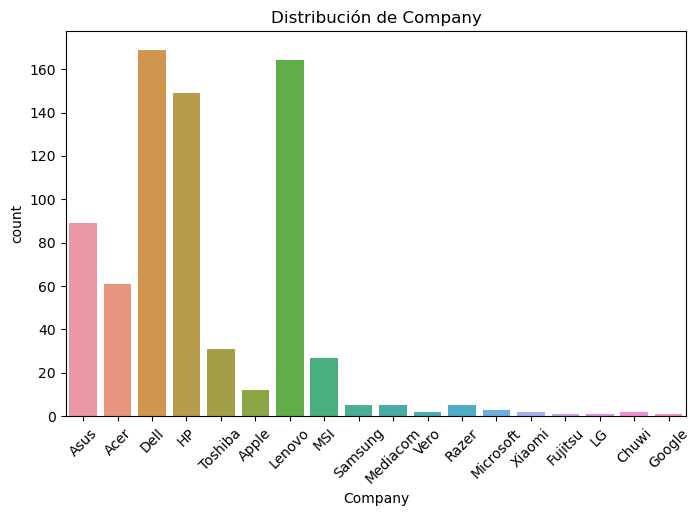

Frecuencia de categorías en Company:
Company
Dell         169
Lenovo       164
HP           149
Asus          89
Acer          61
Toshiba       31
MSI           27
Apple         12
Razer          5
Mediacom       5
Samsung        5
Microsoft      3
Vero           2
Xiaomi         2
Chuwi          2
Fujitsu        1
LG             1
Google         1
Name: count, dtype: int64

Porcentaje de categorías en Company:
Company
Dell         23.18
Lenovo       22.50
HP           20.44
Asus         12.21
Acer          8.37
Toshiba       4.25
MSI           3.70
Apple         1.65
Razer         0.69
Mediacom      0.69
Samsung       0.69
Microsoft     0.41
Vero          0.27
Xiaomi        0.27
Chuwi         0.27
Fujitsu       0.14
LG            0.14
Google        0.14
Name: proportion, dtype: float64

La moda es Dell con una frecuencia de 169
Proporción de la moda: 23.18%

Para TypeName
*************************


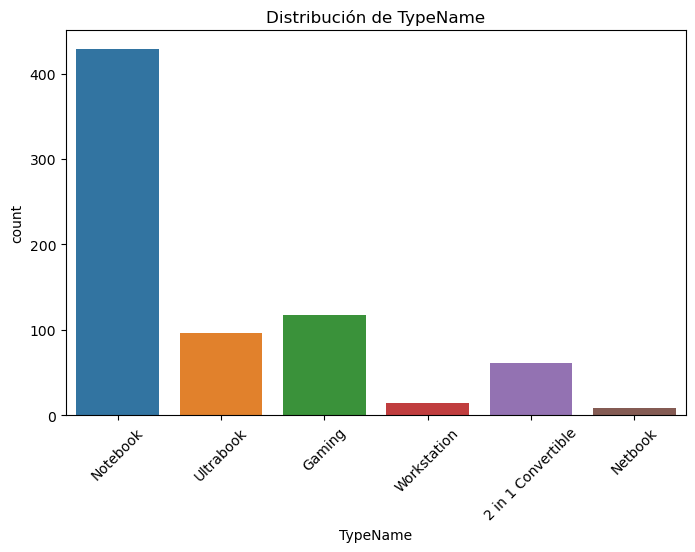

Frecuencia de categorías en TypeName:
TypeName
Notebook              429
Gaming                118
Ultrabook              97
2 in 1 Convertible     61
Workstation            15
Netbook                 9
Name: count, dtype: int64

Porcentaje de categorías en TypeName:
TypeName
Notebook              58.85
Gaming                16.19
Ultrabook             13.31
2 in 1 Convertible     8.37
Workstation            2.06
Netbook                1.23
Name: proportion, dtype: float64

La moda es Notebook con una frecuencia de 429
Proporción de la moda: 58.85%

Para ScreenResolution
*************************


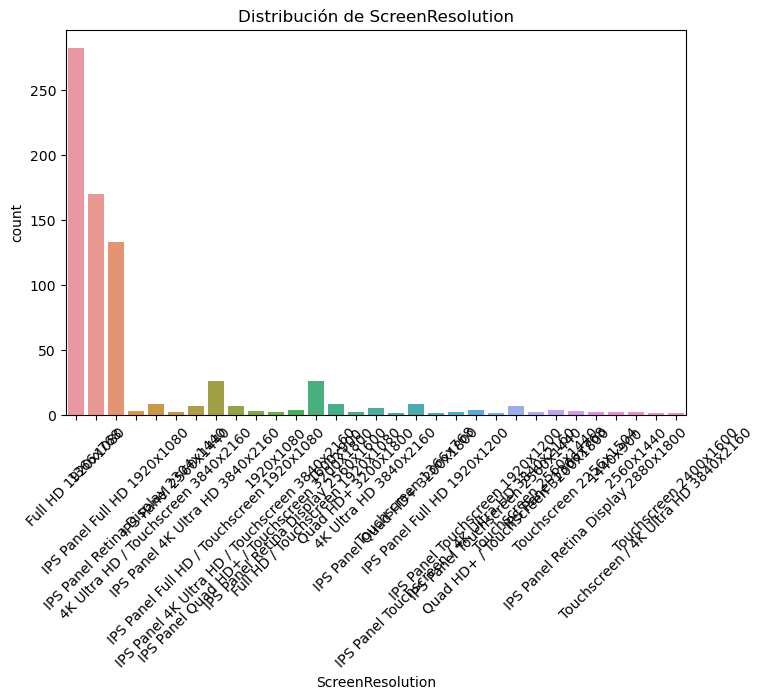

Frecuencia de categorías en ScreenResolution:
ScreenResolution
Full HD 1920x1080                                282
1366x768                                         170
IPS Panel Full HD 1920x1080                      133
Full HD / Touchscreen 1920x1080                   26
IPS Panel Full HD / Touchscreen 1920x1080         26
4K Ultra HD / Touchscreen 3840x2160                8
Touchscreen 1366x768                               8
1600x900                                           8
Quad HD+ / Touchscreen 3200x1800                   7
IPS Panel 4K Ultra HD 3840x2160                    7
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      7
4K Ultra HD 3840x2160                              5
IPS Panel Retina Display 2560x1600                 4
IPS Panel Touchscreen 1920x1200                    4
IPS Panel 1366x768                                 4
IPS Panel Quad HD+ / Touchscreen 3200x1800         3
IPS Panel Retina Display 2304x1440                 3
Touchscreen 2256x1504               

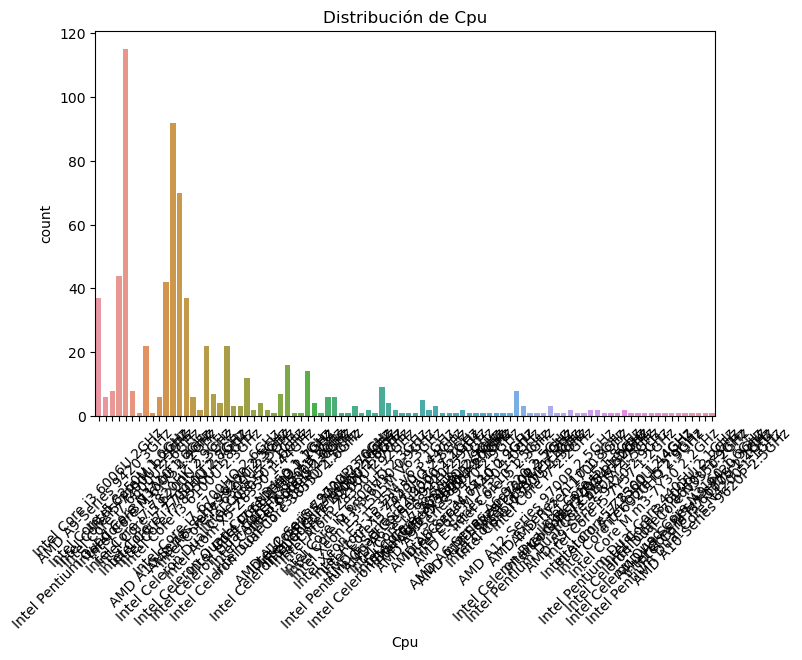

Frecuencia de categorías en Cpu:
Cpu
Intel Core i5 7200U 2.5GHz      115
Intel Core i7 7700HQ 2.8GHz      92
Intel Core i7 7500U 2.7GHz       70
Intel Core i5 8250U 1.6GHz       44
Intel Core i5 6200U 2.3GHz       42
                               ... 
AMD A6-Series A6-9220 2.5GHz      1
AMD A12-Series 9720P 2.7GHz       1
Intel Core i5 2.3GHz              1
AMD Ryzen 1600 3.2GHz             1
AMD A10-Series 9620P 2.5GHz       1
Name: count, Length: 92, dtype: int64

Porcentaje de categorías en Cpu:
Cpu
Intel Core i5 7200U 2.5GHz      15.78
Intel Core i7 7700HQ 2.8GHz     12.62
Intel Core i7 7500U 2.7GHz       9.60
Intel Core i5 8250U 1.6GHz       6.04
Intel Core i5 6200U 2.3GHz       5.76
                                ...  
AMD A6-Series A6-9220 2.5GHz     0.14
AMD A12-Series 9720P 2.7GHz      0.14
Intel Core i5 2.3GHz             0.14
AMD Ryzen 1600 3.2GHz            0.14
AMD A10-Series 9620P 2.5GHz      0.14
Name: proportion, Length: 92, dtype: float64

La moda es Intel Core i5 72

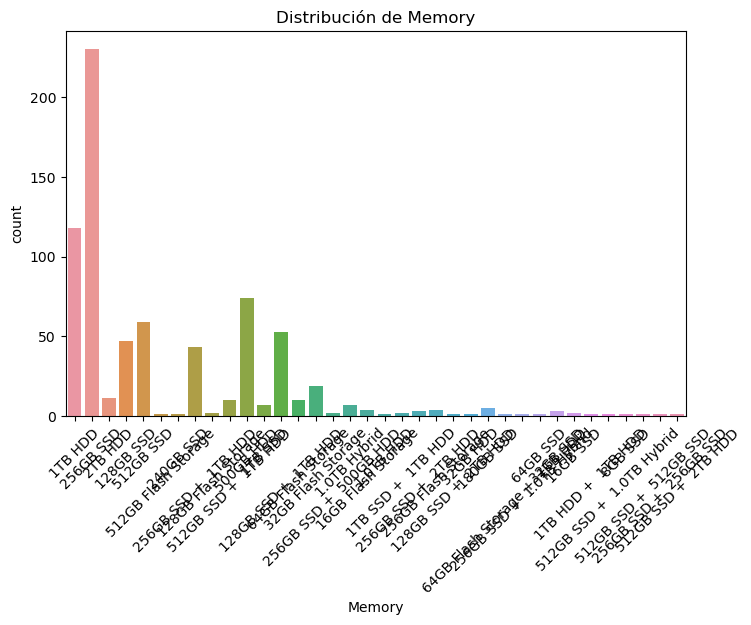

Frecuencia de categorías en Memory:
Memory
256GB SSD                        230
1TB HDD                          118
500GB HDD                         74
512GB SSD                         59
128GB SSD +  1TB HDD              53
128GB SSD                         47
256GB SSD +  1TB HDD              43
32GB Flash Storage                19
2TB HDD                           11
64GB Flash Storage                10
512GB SSD +  1TB HDD              10
1.0TB Hybrid                       7
1TB SSD                            7
180GB SSD                          5
256GB Flash Storage                4
16GB Flash Storage                 4
32GB SSD                           3
256GB SSD +  2TB HDD               3
1TB SSD +  1TB HDD                 2
16GB SSD                           2
256GB SSD +  500GB HDD             2
128GB Flash Storage                2
512GB SSD +  512GB SSD             1
8GB SSD                            1
512GB SSD +  1.0TB Hybrid          1
1TB HDD +  1TB HDD              

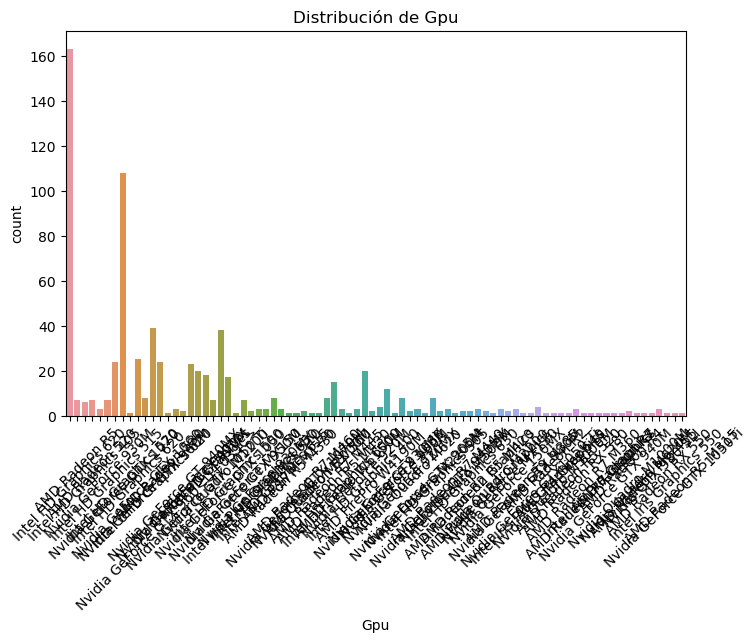

Frecuencia de categorías en Gpu:
Gpu
Intel HD Graphics 620             163
Intel HD Graphics 520             108
Intel UHD Graphics 620             39
Nvidia GeForce GTX 1050            38
Nvidia GeForce GTX 1060            25
                                 ... 
Nvidia Quadro M2200M                1
Nvidia GeForce GTX 960<U+039C>      1
Nvidia GeForce 960M                 1
AMD FirePro W6150M                  1
AMD Radeon R5 M315                  1
Name: count, Length: 82, dtype: int64

Porcentaje de categorías en Gpu:
Gpu
Intel HD Graphics 620             22.36
Intel HD Graphics 520             14.81
Intel UHD Graphics 620             5.35
Nvidia GeForce GTX 1050            5.21
Nvidia GeForce GTX 1060            3.43
                                  ...  
Nvidia Quadro M2200M               0.14
Nvidia GeForce GTX 960<U+039C>     0.14
Nvidia GeForce 960M                0.14
AMD FirePro W6150M                 0.14
AMD Radeon R5 M315                 0.14
Name: proportion, Length: 82,

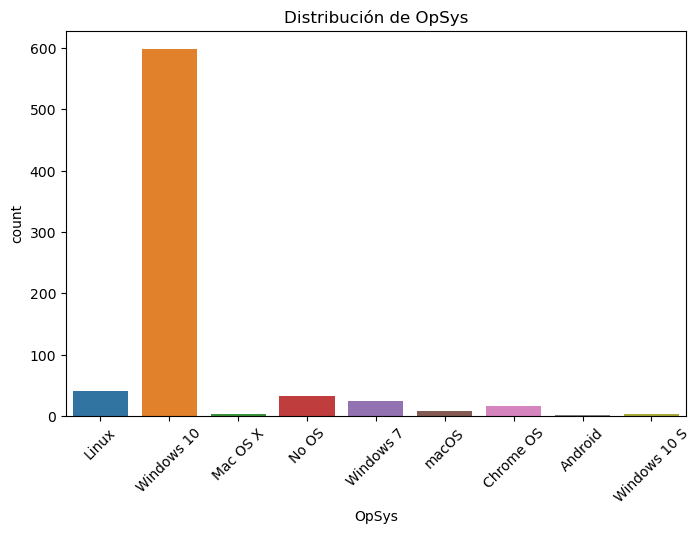

Frecuencia de categorías en OpSys:
OpSys
Windows 10      598
Linux            41
No OS            32
Windows 7        24
Chrome OS        16
macOS             8
Mac OS X          4
Windows 10 S      4
Android           2
Name: count, dtype: int64

Porcentaje de categorías en OpSys:
OpSys
Windows 10      82.03
Linux            5.62
No OS            4.39
Windows 7        3.29
Chrome OS        2.19
macOS            1.10
Mac OS X         0.55
Windows 10 S     0.55
Android          0.27
Name: proportion, dtype: float64

La moda es Windows 10 con una frecuencia de 598
Proporción de la moda: 82.03%

Para Resolution
*************************


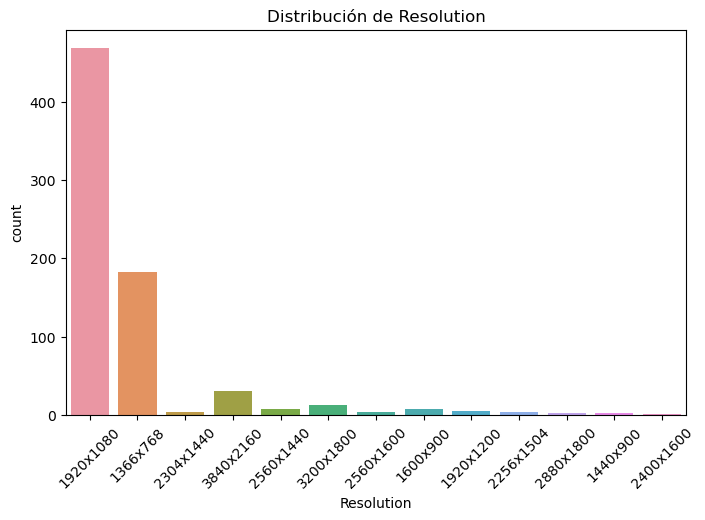

Frecuencia de categorías en Resolution:
Resolution
1920x1080    469
1366x768     182
3840x2160     30
3200x1800     13
1600x900       8
2560x1440      7
1920x1200      5
2560x1600      4
2304x1440      3
2256x1504      3
2880x1800      2
1440x900       2
2400x1600      1
Name: count, dtype: int64

Porcentaje de categorías en Resolution:
Resolution
1920x1080    64.33
1366x768     24.97
3840x2160     4.12
3200x1800     1.78
1600x900      1.10
2560x1440     0.96
1920x1200     0.69
2560x1600     0.55
2304x1440     0.41
2256x1504     0.41
2880x1800     0.27
1440x900      0.27
2400x1600     0.14
Name: proportion, dtype: float64

La moda es 1920x1080 con una frecuencia de 469
Proporción de la moda: 64.33%

Para Pantalla
*************************


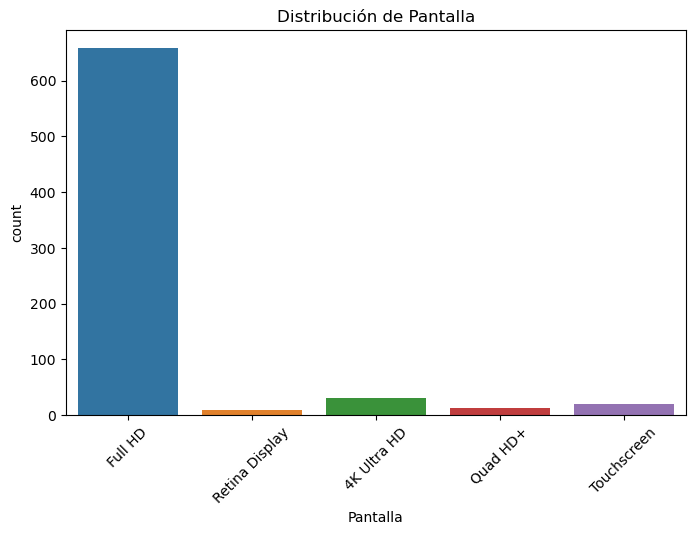

Frecuencia de categorías en Pantalla:
Pantalla
Full HD           658
4K Ultra HD        30
Touchscreen        19
Quad HD+           13
Retina Display      9
Name: count, dtype: int64

Porcentaje de categorías en Pantalla:
Pantalla
Full HD           90.26
4K Ultra HD        4.12
Touchscreen        2.61
Quad HD+           1.78
Retina Display     1.23
Name: proportion, dtype: float64

La moda es Full HD con una frecuencia de 658
Proporción de la moda: 90.26%

Para Brand
*************************


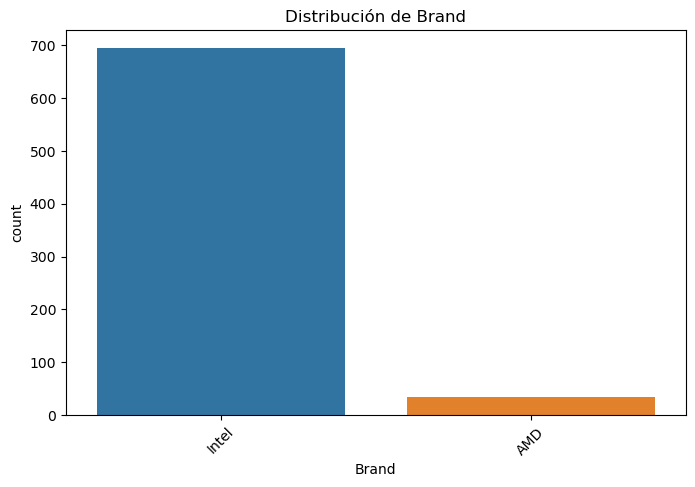

Frecuencia de categorías en Brand:
Brand
Intel    694
AMD       35
Name: count, dtype: int64

Porcentaje de categorías en Brand:
Brand
Intel    95.2
AMD       4.8
Name: proportion, dtype: float64

La moda es Intel con una frecuencia de 694
Proporción de la moda: 95.20%

Para Family
*************************


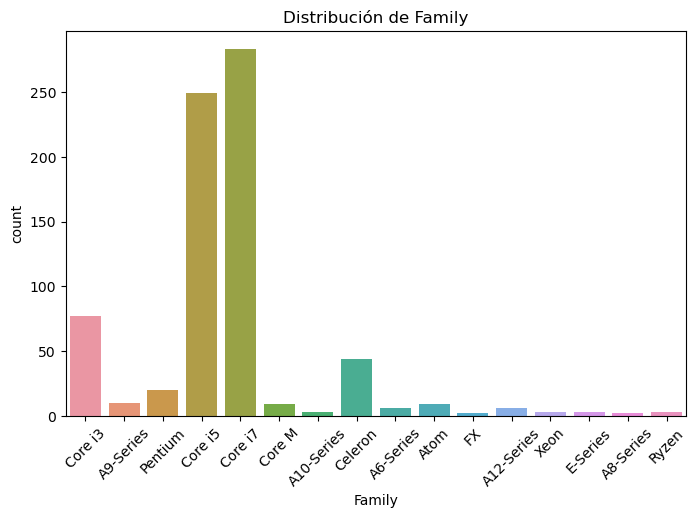

Frecuencia de categorías en Family:
Family
Core i7       283
Core i5       249
Core i3        77
Celeron        44
Pentium        20
A9-Series      10
Core M          9
Atom            9
A6-Series       6
A12-Series      6
A10-Series      3
Xeon            3
E-Series        3
Ryzen           3
FX              2
A8-Series       2
Name: count, dtype: int64

Porcentaje de categorías en Family:
Family
Core i7       38.82
Core i5       34.16
Core i3       10.56
Celeron        6.04
Pentium        2.74
A9-Series      1.37
Core M         1.23
Atom           1.23
A6-Series      0.82
A12-Series     0.82
A10-Series     0.41
Xeon           0.41
E-Series       0.41
Ryzen          0.41
FX             0.27
A8-Series      0.27
Name: proportion, dtype: float64

La moda es Core i7 con una frecuencia de 283
Proporción de la moda: 38.82%

Para Model
*************************


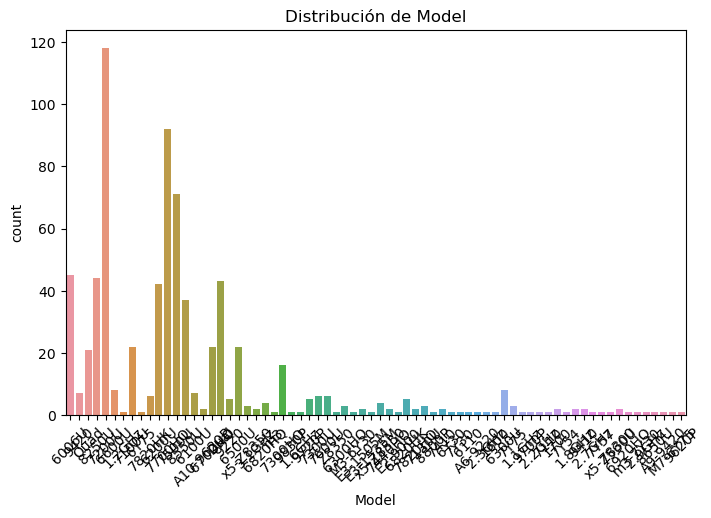

Frecuencia de categorías en Model:
Model
7200U      118
7700HQ      92
7500U       71
6006U       45
8250U       44
          ... 
A6-9220      1
9830P        1
1600         1
1.2GHz       1
9620P        1
Name: count, Length: 70, dtype: int64

Porcentaje de categorías en Model:
Model
7200U      16.19
7700HQ     12.62
7500U       9.74
6006U       6.17
8250U       6.04
           ...  
A6-9220     0.14
9830P       0.14
1600        0.14
1.2GHz      0.14
9620P       0.14
Name: proportion, Length: 70, dtype: float64

La moda es 7200U con una frecuencia de 118
Proporción de la moda: 16.19%

Para Gpu Brand
*************************


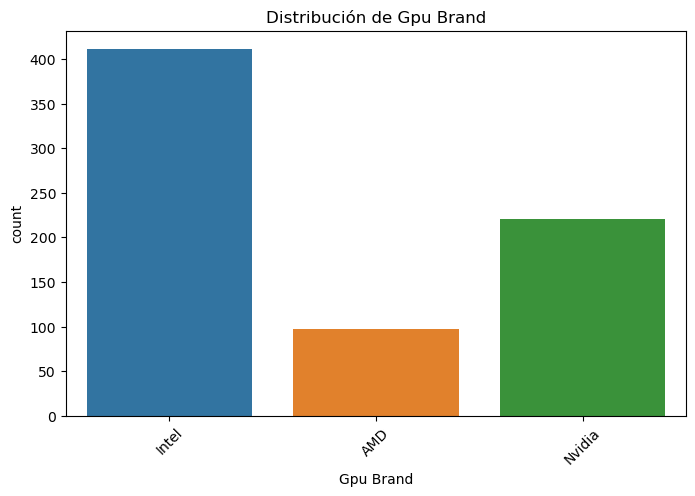

Frecuencia de categorías en Gpu Brand:
Gpu Brand
Intel     411
Nvidia    221
AMD        97
Name: count, dtype: int64

Porcentaje de categorías en Gpu Brand:
Gpu Brand
Intel     56.38
Nvidia    30.32
AMD       13.31
Name: proportion, dtype: float64

La moda es Intel con una frecuencia de 411
Proporción de la moda: 56.38%

Para Gpu Model
*************************


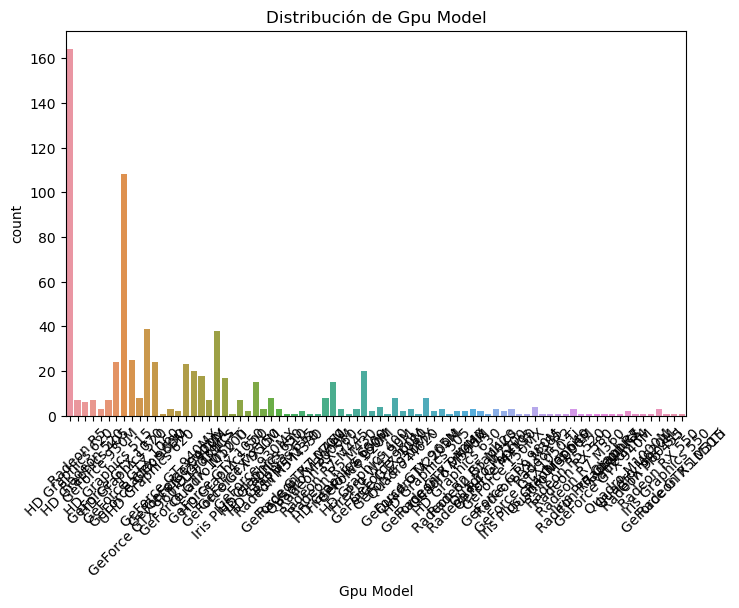

Frecuencia de categorías en Gpu Model:
Gpu Model
HD Graphics 620     164
HD Graphics 520     108
UHD Graphics 620     39
GeForce GTX 1050     38
GeForce GTX 1060     25
                   ... 
Quadro M2200          1
R17M-M1-70            1
GeForce 960M          1
Quadro M500M          1
Radeon R5 M315        1
Name: count, Length: 80, dtype: int64

Porcentaje de categorías en Gpu Model:
Gpu Model
HD Graphics 620     22.50
HD Graphics 520     14.81
UHD Graphics 620     5.35
GeForce GTX 1050     5.21
GeForce GTX 1060     3.43
                    ...  
Quadro M2200         0.14
R17M-M1-70           0.14
GeForce 960M         0.14
Quadro M500M         0.14
Radeon R5 M315       0.14
Name: proportion, Length: 80, dtype: float64

La moda es HD Graphics 620 con una frecuencia de 164
Proporción de la moda: 22.50%

Para Gpu Type
*************************


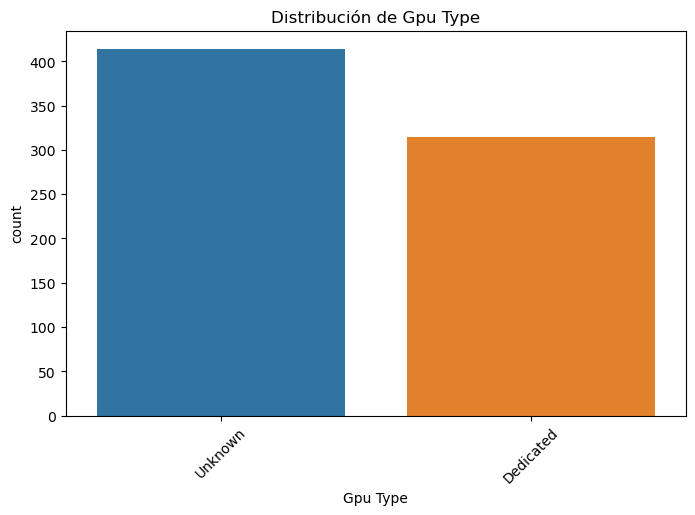

Frecuencia de categorías en Gpu Type:
Gpu Type
Unknown      414
Dedicated    315
Name: count, dtype: int64

Porcentaje de categorías en Gpu Type:
Gpu Type
Unknown      56.79
Dedicated    43.21
Name: proportion, dtype: float64

La moda es Unknown con una frecuencia de 414
Proporción de la moda: 56.79%

Para Storage Type
*************************


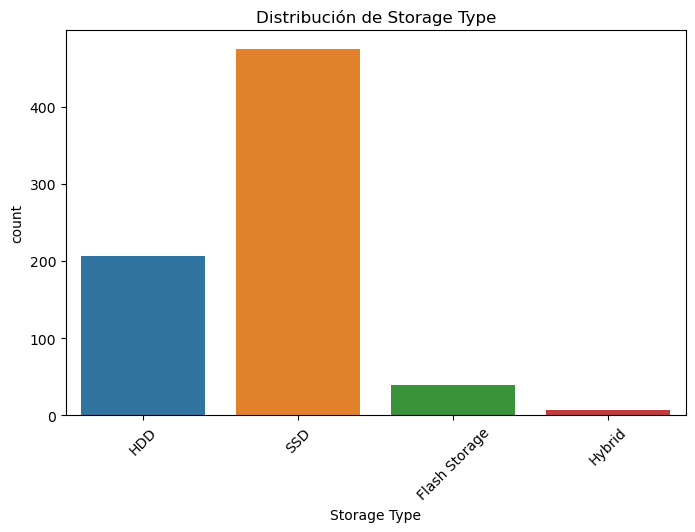

Frecuencia de categorías en Storage Type:
Storage Type
SSD              475
HDD              207
Flash Storage     40
Hybrid             7
Name: count, dtype: int64

Porcentaje de categorías en Storage Type:
Storage Type
SSD              65.16
HDD              28.40
Flash Storage     5.49
Hybrid            0.96
Name: proportion, dtype: float64

La moda es SSD con una frecuencia de 475
Proporción de la moda: 65.16%

Para Price_disc
*************************


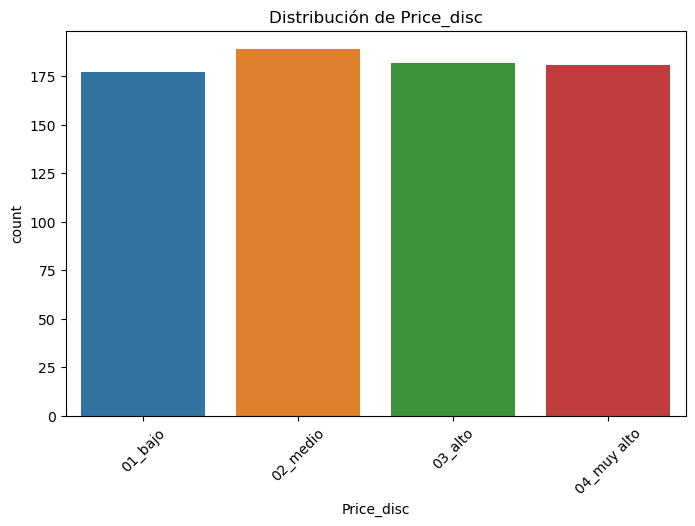

Frecuencia de categorías en Price_disc:
Price_disc
02_medio       189
03_alto        182
04_muy alto    181
01_bajo        177
Name: count, dtype: int64

Porcentaje de categorías en Price_disc:
Price_disc
02_medio       25.93
03_alto        24.97
04_muy alto    24.83
01_bajo        24.28
Name: proportion, dtype: float64

La moda es 02_medio con una frecuencia de 189
Proporción de la moda: 25.93%



In [8]:
analisis_univariable_categoricas(train_set,features_cat)

### Numéricas

Para Inches
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


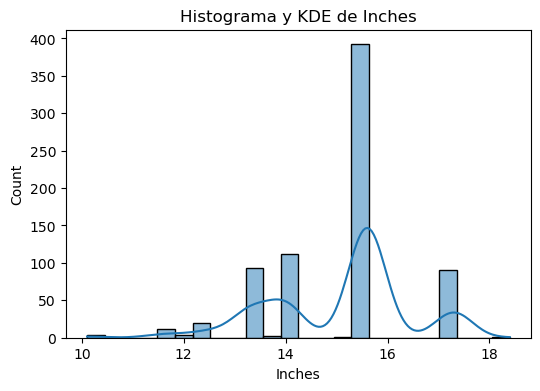

count    729.00
mean      15.08
std        1.38
min       10.10
25%       14.00
50%       15.60
75%       15.60
max       18.40
Name: Inches, dtype: float64

La moda es 15.60, el coeficiente de variación es 9.14% y el IQR es 1.60

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: -0.51, valores extendidos a la izquierda

Curtosis: 0.31. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=50.24

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Ram
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


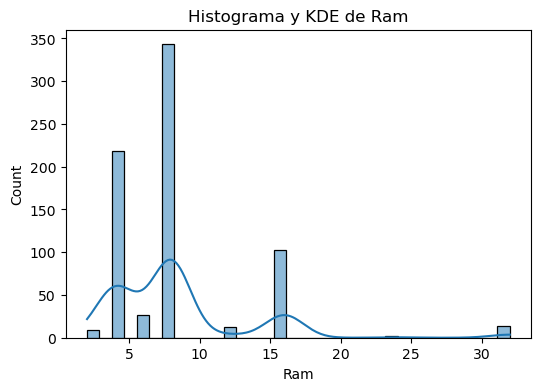

count    729.00
mean       8.36
std        5.14
min        2.00
25%        4.00
50%        8.00
75%        8.00
max       32.00
Name: Ram, dtype: float64

La moda es 8.00, el coeficiente de variación es 61.41% y el IQR es 4.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.22, valores extendidos a la derecha

Curtosis: 6.76. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=66.25

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 16 y suponen en proporción 2.19%

La variable Ram puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=6.76, asimetria=2.22

Para Weight
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


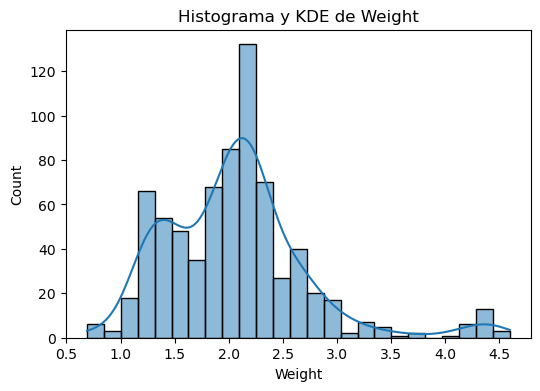

count    729.00
mean       2.06
std        0.67
min        0.69
25%        1.60
50%        2.04
75%        2.31
max        4.60
Name: Weight, dtype: float64

La moda es 2.20, el coeficiente de variación es 32.29% y el IQR es 0.71

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.19, valores extendidos a la derecha

Curtosis: 2.68. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=11.86

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 3 y suponen en proporción 0.41%

Para Price_euros
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


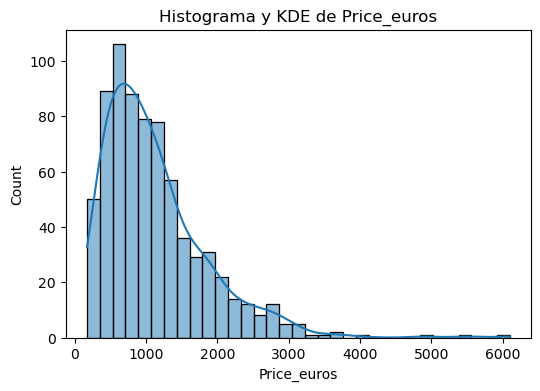

count     729.00
mean     1122.04
std       727.65
min       174.00
25%       599.00
50%       949.00
75%      1429.00
max      6099.00
Name: Price_euros, dtype: float64

La moda es 1099.00, el coeficiente de variación es 64.85% y el IQR es 830.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.78, valores extendidos a la derecha

Curtosis: 5.77. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=20.37

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 4 y suponen en proporción 0.55%

La variable Price_euros puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=5.77, asimetria=1.78

Para Clock Speed (GHz)
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


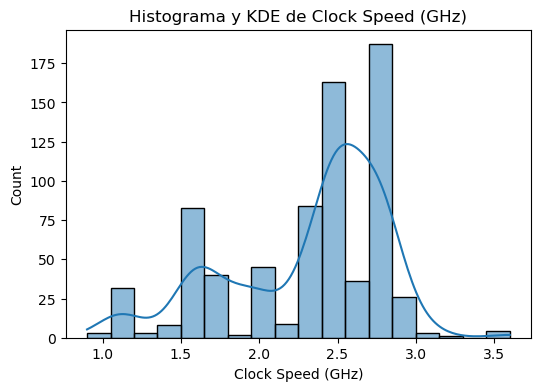

count    729.00
mean       2.31
std        0.50
min        0.90
25%        2.00
50%        2.50
75%        2.70
max        3.60
Name: Clock Speed (GHz), dtype: float64

La moda es 2.50, el coeficiente de variación es 21.74% y el IQR es 0.70

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: -0.80, valores extendidos a la izquierda

Curtosis: -0.10. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=31.01

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para Storage Capacity (GB)
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


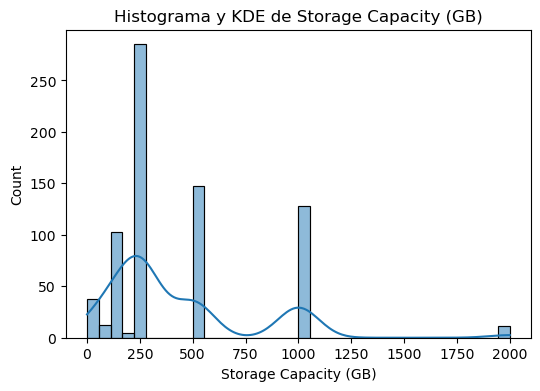

count     729.00
mean      429.37
std       362.82
min         0.00
25%       256.00
50%       256.00
75%       512.00
max      2000.00
Name: Storage Capacity (GB), dtype: float64

La moda es 256.00, el coeficiente de variación es 84.50% y el IQR es 256.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.70, valores extendidos a la derecha

Curtosis: 3.58. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=58.48

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 11 y suponen en proporción 1.51%

La variable Storage Capacity (GB) puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=3.58, asimetria=1.7

features_log: ['Ram', 'Price_euros', 'Storage Capacity (GB)']

features_no_log: ['Inches', 'Weight', 'Clock Speed (GHz)']


,Shapiro,Jarque_Bera,Anderson,Asimetría,Curtosis,Outliers_inf_pro,Outliers_sup_pro,Log_transform
Inches,0.0,0.0,50.24,-0.51,0.31,0.0,0.00,False
Ram,0.0,0.0,66.25,2.22,6.76,0.0,2.19,True
Weight,0.0,0.0,11.86,1.19,2.68,0.0,0.41,False
Price_euros,0.0,0.0,20.37,1.78,5.77,0.0,0.55,True
Clock Speed (GHz),0.0,0.0,31.01,-0.80,-0.10,0.0,0.00,False
Storage Capacity (GB),0.0,0.0,58.48,1.70,3.58,0.0,1.51,True


In [9]:
analisis_univariable_numericas(train_set,features_num)

## Análisis Bivariable

In [10]:
# Saco la target de la listas de features
features_num_sin = features_num.remove('Price_euros')
features_cat_sin = features_cat.remove('Price_disc')

In [11]:
features_num

['Inches', 'Ram', 'Weight', 'Clock Speed (GHz)', 'Storage Capacity (GB)']

In [12]:
features_cat

['Company',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Memory',
 'Gpu',
 'OpSys',
 'Resolution',
 'Pantalla',
 'Brand',
 'Family',
 'Model',
 'Gpu Brand',
 'Gpu Model',
 'Gpu Type',
 'Storage Type']

c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

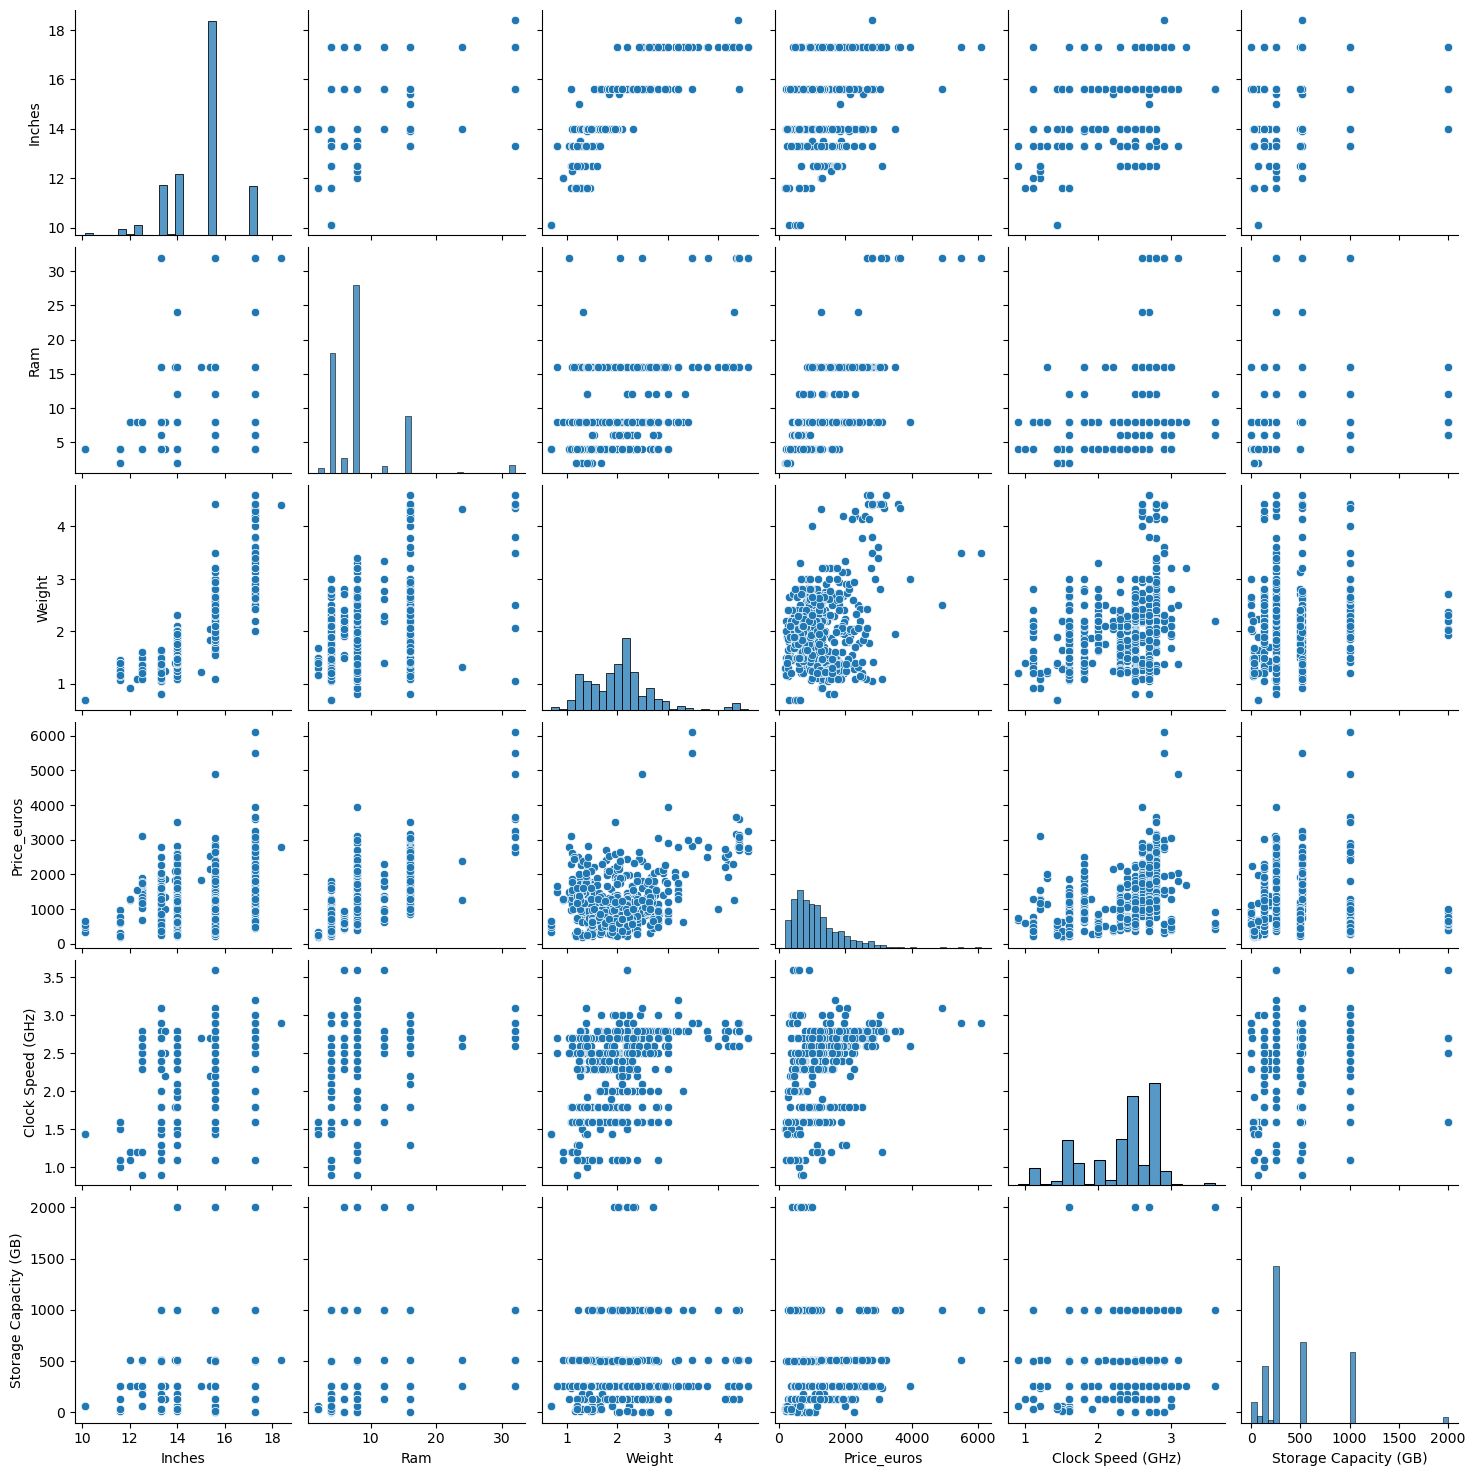

In [13]:
sns.pairplot(train_set)

### Categóricas con target

Análisis de Company vs Price_disc
****************************************


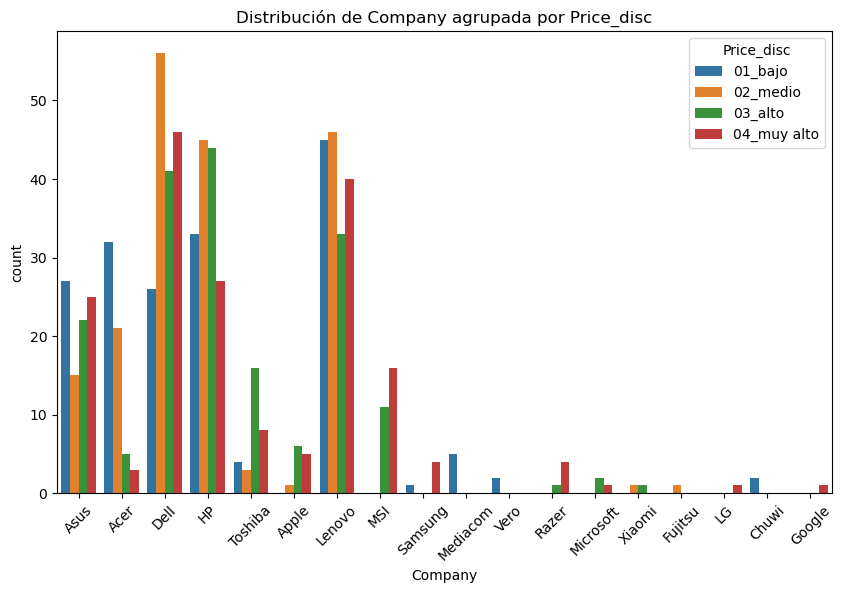

Tabla de contingencia (proporciones):
Price_disc  01_bajo  02_medio  03_alto  04_muy alto
Company                                            
Acer           0.52      0.34     0.08         0.05
Apple          0.00      0.08     0.50         0.42
Asus           0.30      0.17     0.25         0.28
Chuwi          1.00      0.00     0.00         0.00
Dell           0.15      0.33     0.24         0.27
Fujitsu        0.00      1.00     0.00         0.00
Google         0.00      0.00     0.00         1.00
HP             0.22      0.30     0.30         0.18
LG             0.00      0.00     0.00         1.00
Lenovo         0.27      0.28     0.20         0.24
MSI            0.00      0.00     0.41         0.59
Mediacom       1.00      0.00     0.00         0.00
Microsoft      0.00      0.00     0.67         0.33
Razer          0.00      0.00     0.20         0.80
Samsung        0.20      0.00     0.00         0.80
Toshiba        0.13      0.10     0.52         0.26
Vero           1.00      0

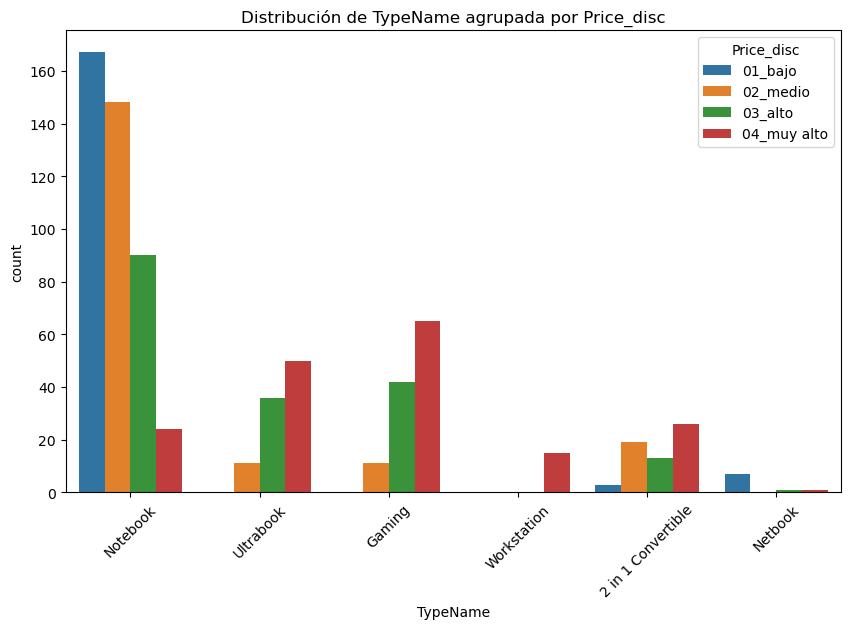

Tabla de contingencia (proporciones):
Price_disc          01_bajo  02_medio  03_alto  04_muy alto
TypeName                                                   
2 in 1 Convertible     0.05      0.31     0.21         0.43
Gaming                 0.00      0.09     0.36         0.55
Netbook                0.78      0.00     0.11         0.11
Notebook               0.39      0.34     0.21         0.06
Ultrabook              0.00      0.11     0.37         0.52
Workstation            0.00      0.00     0.00         1.00

Prueba Chi-cuadrado:
Chi-cuadrado: 349.80
p-valor: 0.000
Grados de libertad: 15

La variable TypeName está significativamente asociada con Price_disc (p < 0.05). Podría ser útil para el modelo.

Análisis de ScreenResolution vs Price_disc
****************************************


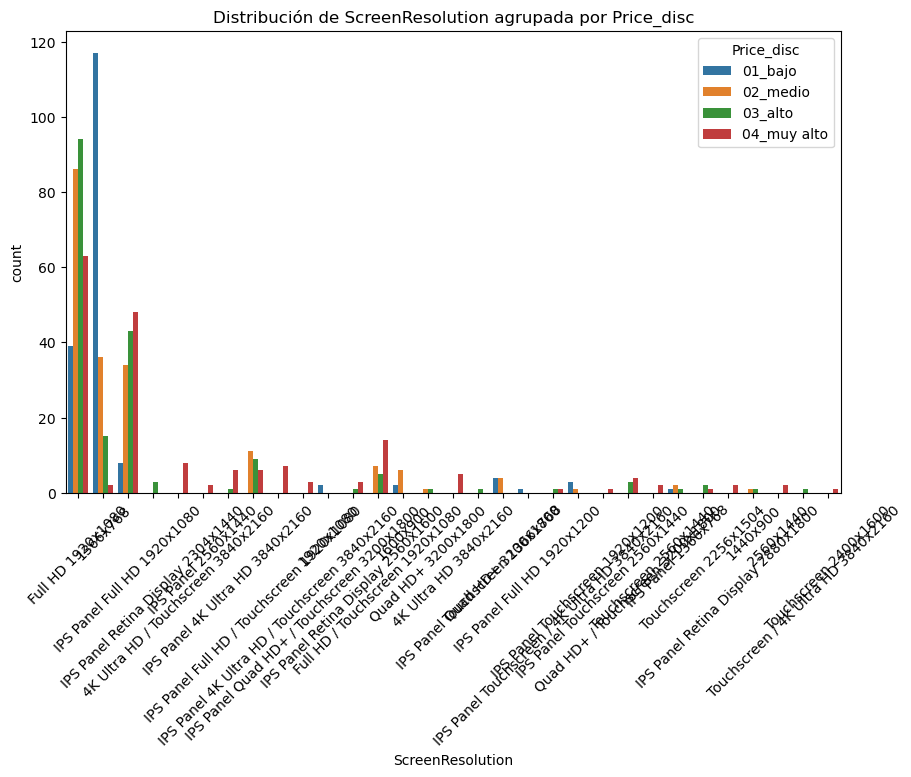

Tabla de contingencia (proporciones):
Price_disc                                     01_bajo  02_medio  03_alto  \
ScreenResolution                                                            
1366x768                                          0.69      0.21     0.09   
1440x900                                          0.00      0.50     0.50   
1600x900                                          0.25      0.75     0.00   
1920x1080                                         1.00      0.00     0.00   
2560x1440                                         0.00      0.00     0.00   
4K Ultra HD / Touchscreen 3840x2160               0.00      0.00     0.00   
4K Ultra HD 3840x2160                             0.00      0.00     0.00   
Full HD / Touchscreen 1920x1080                   0.00      0.27     0.19   
Full HD 1920x1080                                 0.14      0.30     0.33   
IPS Panel 1366x768                                0.25      0.50     0.25   
IPS Panel 2560x1440                   

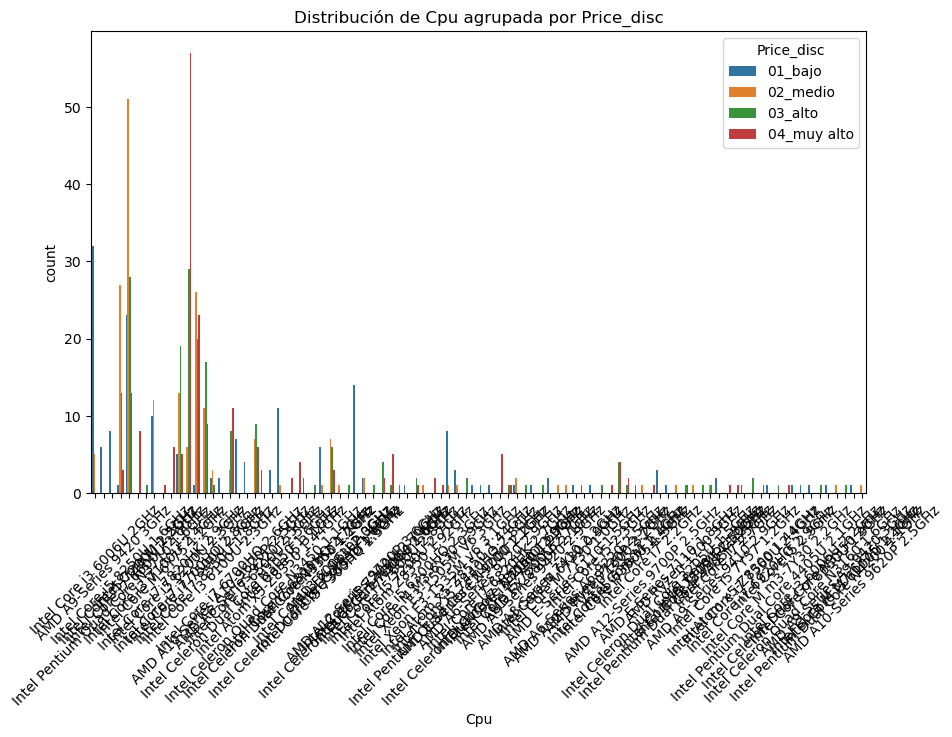

Tabla de contingencia (proporciones):
Price_disc                            01_bajo  02_medio  03_alto  04_muy alto
Cpu                                                                          
AMD A10-Series 9620P 2.5GHz              0.00      1.00      0.0          0.0
AMD A10-Series A10-9620P 2.5GHz          1.00      0.00      0.0          0.0
AMD A12-Series 9700P 2.5GHz              0.00      1.00      0.0          0.0
AMD A12-Series 9720P 2.7GHz              1.00      0.00      0.0          0.0
AMD A12-Series 9720P 3.6GHz              0.50      0.50      0.0          0.0
...                                       ...       ...      ...          ...
Intel Pentium Dual Core N4200 1.1GHz     1.00      0.00      0.0          0.0
Intel Pentium Quad Core N3710 1.6GHz     1.00      0.00      0.0          0.0
Intel Pentium Quad Core N4200 1.1GHz     0.89      0.11      0.0          0.0
Intel Xeon E3-1505M V6 3GHz              0.00      0.00      0.0          1.0
Intel Xeon E3-1535M v6 3.1

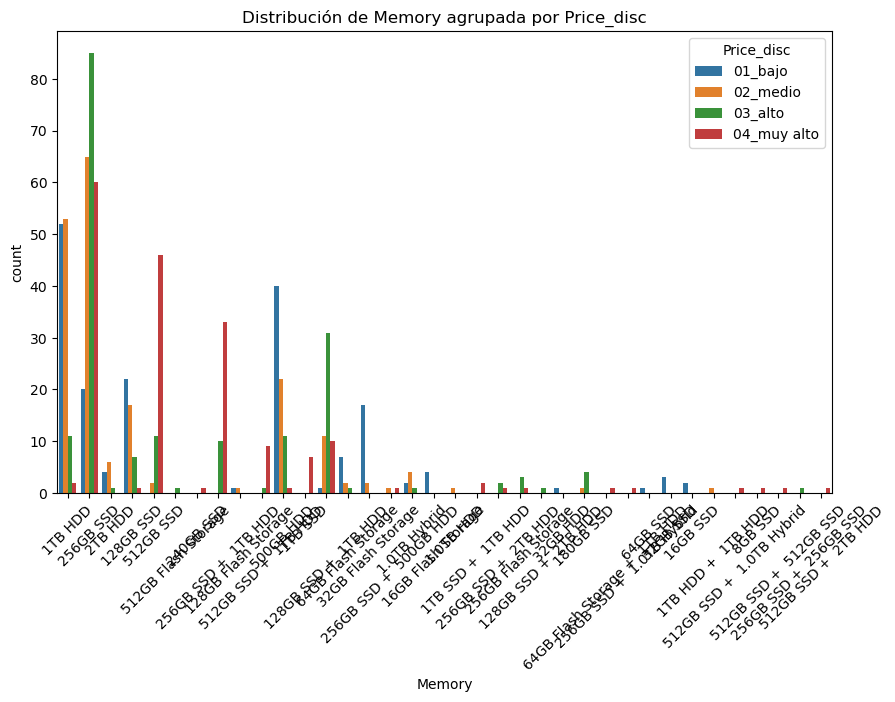

Tabla de contingencia (proporciones):
Price_disc                     01_bajo  02_medio  03_alto  04_muy alto
Memory                                                                
1.0TB HDD                         0.00      1.00     0.00         0.00
1.0TB Hybrid                      0.29      0.57     0.14         0.00
128GB Flash Storage               0.50      0.50     0.00         0.00
128GB SSD                         0.47      0.36     0.15         0.02
128GB SSD +  1TB HDD              0.02      0.21     0.58         0.19
128GB SSD +  2TB HDD              0.00      0.00     1.00         0.00
16GB Flash Storage                1.00      0.00     0.00         0.00
16GB SSD                          1.00      0.00     0.00         0.00
180GB SSD                         0.00      0.20     0.80         0.00
1TB HDD                           0.44      0.45     0.09         0.02
1TB HDD +  1TB HDD                0.00      1.00     0.00         0.00
1TB SSD                           0.00 

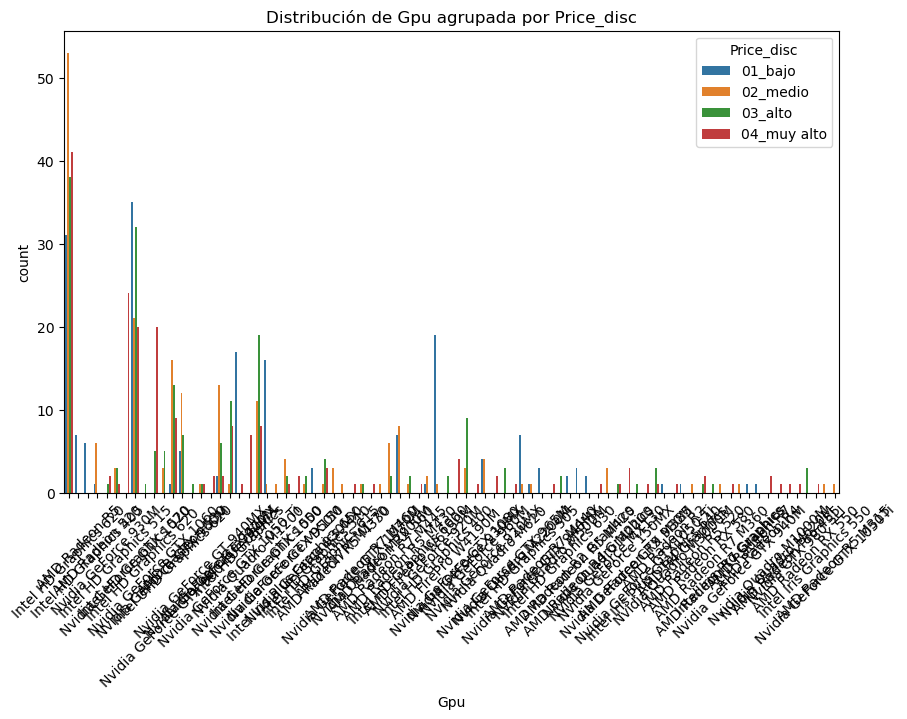

Tabla de contingencia (proporciones):
Price_disc            01_bajo  02_medio  03_alto  04_muy alto
Gpu                                                          
AMD FirePro W4190M       0.00      0.00      1.0          0.0
AMD FirePro W6150M       0.00      0.00      0.0          1.0
AMD R17M-M1-70           0.00      1.00      0.0          0.0
AMD R4 Graphics          1.00      0.00      0.0          0.0
AMD Radeon 520           0.14      0.86      0.0          0.0
...                       ...       ...      ...          ...
Nvidia Quadro M2200M     0.00      0.00      0.0          1.0
Nvidia Quadro M3000M     0.00      0.00      0.0          1.0
Nvidia Quadro M500M      0.00      0.00      0.0          1.0
Nvidia Quadro M620       0.00      0.00      0.0          1.0
Nvidia Quadro M620M      0.00      0.00      0.0          1.0

[82 rows x 4 columns]

Prueba Chi-cuadrado:
Chi-cuadrado: 770.86
p-valor: 0.000
Grados de libertad: 243

La variable Gpu está significativamente asociada c

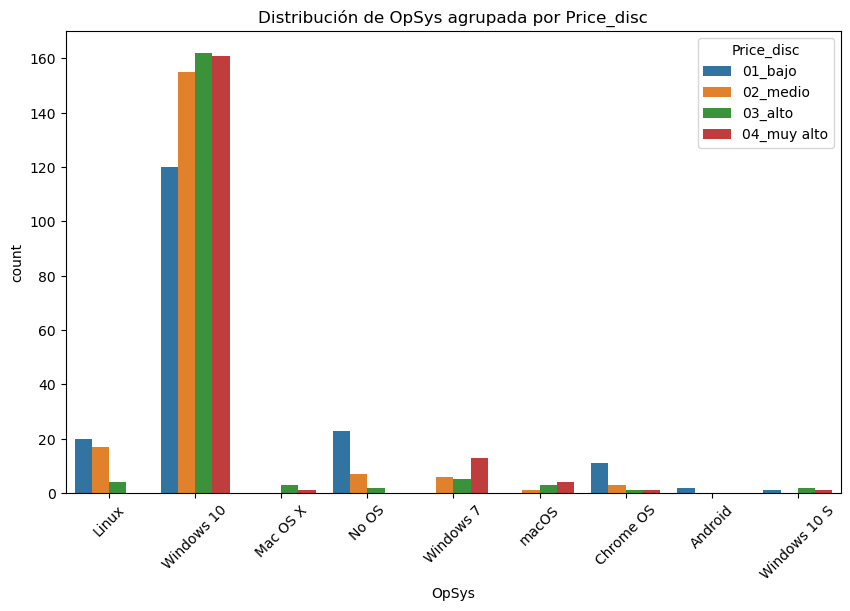

Tabla de contingencia (proporciones):
Price_disc    01_bajo  02_medio  03_alto  04_muy alto
OpSys                                                
Android          1.00      0.00     0.00         0.00
Chrome OS        0.69      0.19     0.06         0.06
Linux            0.49      0.41     0.10         0.00
Mac OS X         0.00      0.00     0.75         0.25
No OS            0.72      0.22     0.06         0.00
Windows 10       0.20      0.26     0.27         0.27
Windows 10 S     0.25      0.00     0.50         0.25
Windows 7        0.00      0.25     0.21         0.54
macOS            0.00      0.12     0.38         0.50

Prueba Chi-cuadrado:
Chi-cuadrado: 128.42
p-valor: 0.000
Grados de libertad: 24

La variable OpSys está significativamente asociada con Price_disc (p < 0.05). Podría ser útil para el modelo.

Análisis de Resolution vs Price_disc
****************************************


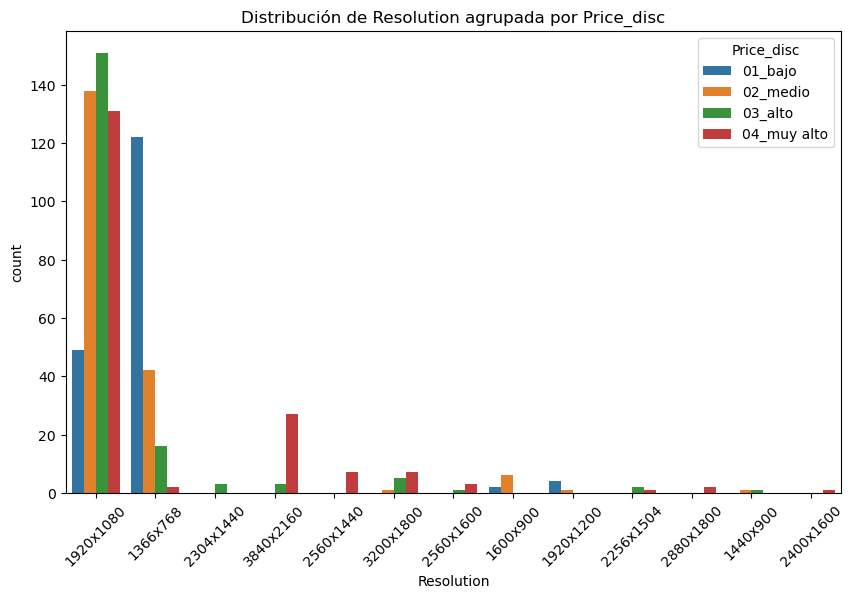

Tabla de contingencia (proporciones):
Price_disc  01_bajo  02_medio  03_alto  04_muy alto
Resolution                                         
1366x768       0.67      0.23     0.09         0.01
1440x900       0.00      0.50     0.50         0.00
1600x900       0.25      0.75     0.00         0.00
1920x1080      0.10      0.29     0.32         0.28
1920x1200      0.80      0.20     0.00         0.00
2256x1504      0.00      0.00     0.67         0.33
2304x1440      0.00      0.00     1.00         0.00
2400x1600      0.00      0.00     0.00         1.00
2560x1440      0.00      0.00     0.00         1.00
2560x1600      0.00      0.00     0.25         0.75
2880x1800      0.00      0.00     0.00         1.00
3200x1800      0.00      0.08     0.38         0.54
3840x2160      0.00      0.00     0.10         0.90

Prueba Chi-cuadrado:
Chi-cuadrado: 399.33
p-valor: 0.000
Grados de libertad: 36

La variable Resolution está significativamente asociada con Price_disc (p < 0.05). Podría ser útil p

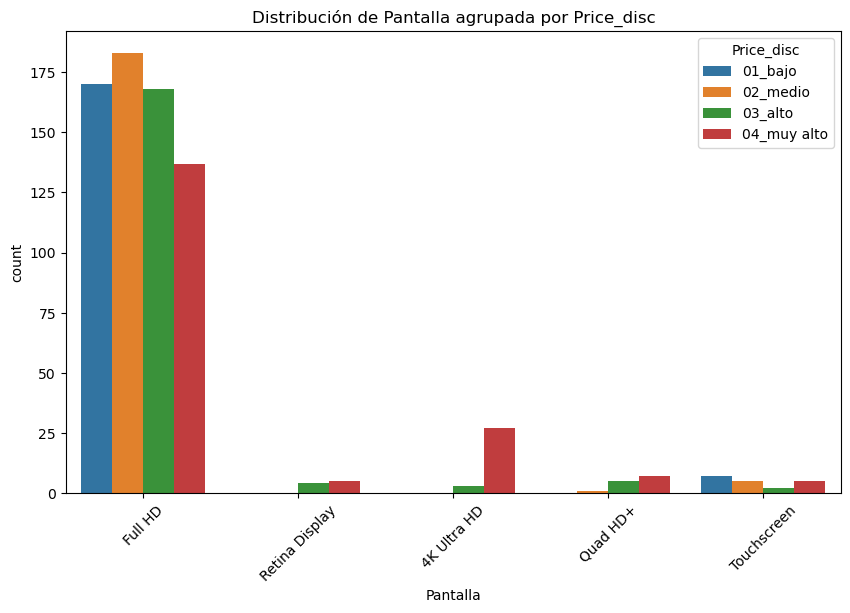

Tabla de contingencia (proporciones):
Price_disc      01_bajo  02_medio  03_alto  04_muy alto
Pantalla                                               
4K Ultra HD        0.00      0.00     0.10         0.90
Full HD            0.26      0.28     0.26         0.21
Quad HD+           0.00      0.08     0.38         0.54
Retina Display     0.00      0.00     0.44         0.56
Touchscreen        0.37      0.26     0.11         0.26

Prueba Chi-cuadrado:
Chi-cuadrado: 97.30
p-valor: 0.000
Grados de libertad: 12

La variable Pantalla está significativamente asociada con Price_disc (p < 0.05). Podría ser útil para el modelo.

Análisis de Brand vs Price_disc
****************************************


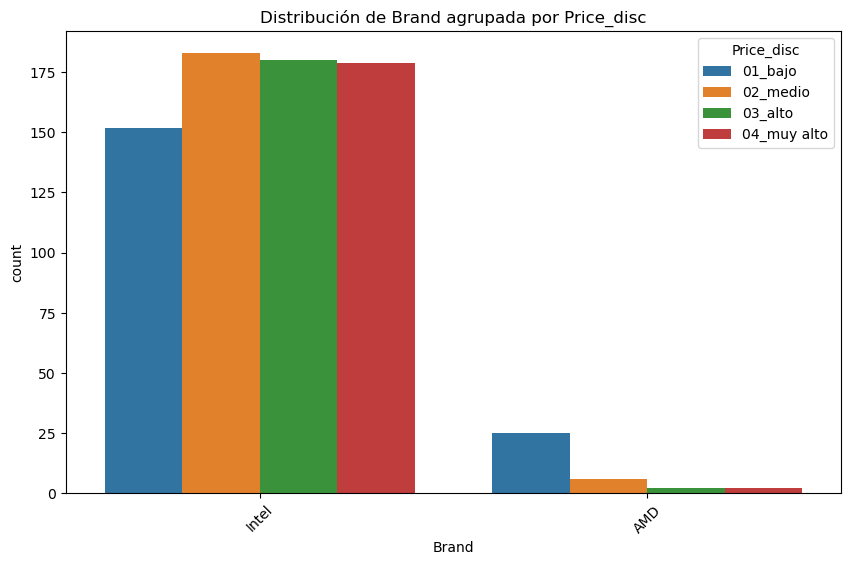

Tabla de contingencia (proporciones):
Price_disc  01_bajo  02_medio  03_alto  04_muy alto
Brand                                              
AMD            0.71      0.17     0.06         0.06
Intel          0.22      0.26     0.26         0.26

Prueba Chi-cuadrado:
Chi-cuadrado: 45.62
p-valor: 0.000
Grados de libertad: 3

La variable Brand está significativamente asociada con Price_disc (p < 0.05). Podría ser útil para el modelo.

Análisis de Family vs Price_disc
****************************************


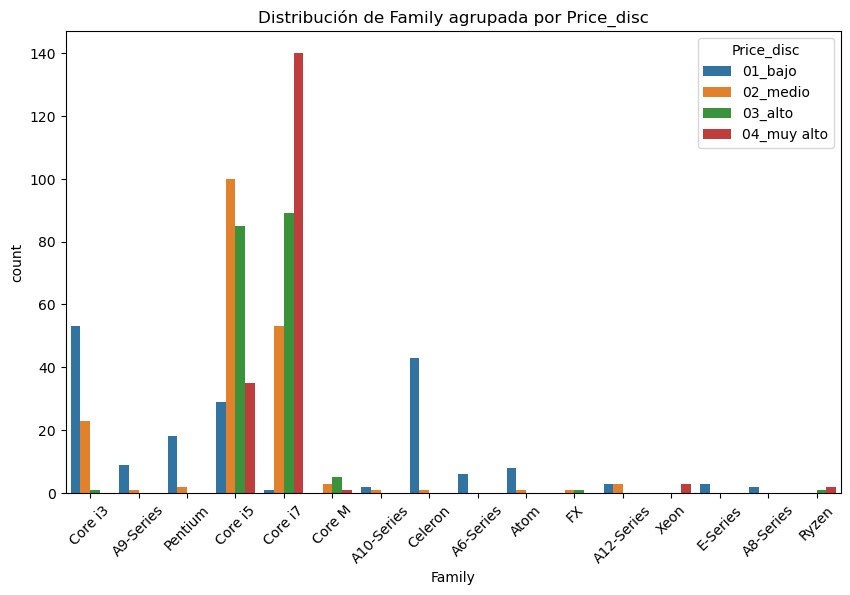

Tabla de contingencia (proporciones):
Price_disc  01_bajo  02_medio  03_alto  04_muy alto
Family                                             
A10-Series     0.67      0.33     0.00         0.00
A12-Series     0.50      0.50     0.00         0.00
A6-Series      1.00      0.00     0.00         0.00
A8-Series      1.00      0.00     0.00         0.00
A9-Series      0.90      0.10     0.00         0.00
Atom           0.89      0.11     0.00         0.00
Celeron        0.98      0.02     0.00         0.00
Core M         0.00      0.33     0.56         0.11
Core i3        0.69      0.30     0.01         0.00
Core i5        0.12      0.40     0.34         0.14
Core i7        0.00      0.19     0.31         0.49
E-Series       1.00      0.00     0.00         0.00
FX             0.00      0.50     0.50         0.00
Pentium        0.90      0.10     0.00         0.00
Ryzen          0.00      0.00     0.33         0.67
Xeon           0.00      0.00     0.00         1.00

Prueba Chi-cuadrado:
Chi-

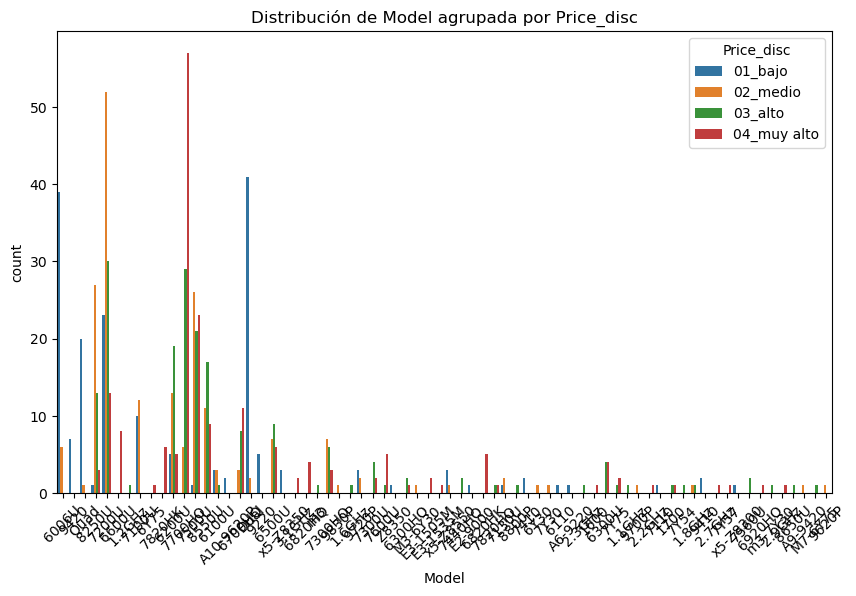

Tabla de contingencia (proporciones):
Price_disc  01_bajo  02_medio  03_alto  04_muy alto
Model                                              
1.1GHz         0.00      0.00      1.0          0.0
1.2GHz         0.00      0.00      1.0          0.0
1.6GHz         0.00      0.00      1.0          0.0
1.8GHz         0.00      0.50      0.5          0.0
1600           0.00      0.00      0.0          1.0
...             ...       ...      ...          ...
m3             0.00      0.00      1.0          0.0
m3-7Y30        0.00      0.00      1.0          0.0
x5-Z8300       1.00      0.00      0.0          0.0
x5-Z8350       1.00      0.00      0.0          0.0
x5-Z8550       0.75      0.25      0.0          0.0

[70 rows x 4 columns]

Prueba Chi-cuadrado:
Chi-cuadrado: 834.15
p-valor: 0.000
Grados de libertad: 207

La variable Model está significativamente asociada con Price_disc (p < 0.05). Podría ser útil para el modelo.

Análisis de Gpu Brand vs Price_disc
*********************************

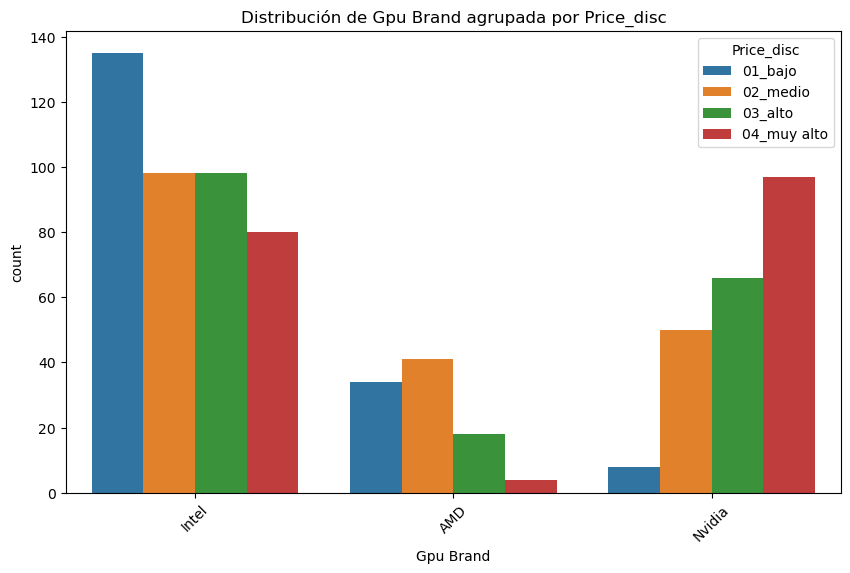

Tabla de contingencia (proporciones):
Price_disc  01_bajo  02_medio  03_alto  04_muy alto
Gpu Brand                                          
AMD            0.35      0.42     0.19         0.04
Intel          0.33      0.24     0.24         0.19
Nvidia         0.04      0.23     0.30         0.44

Prueba Chi-cuadrado:
Chi-cuadrado: 125.30
p-valor: 0.000
Grados de libertad: 6

La variable Gpu Brand está significativamente asociada con Price_disc (p < 0.05). Podría ser útil para el modelo.

Análisis de Gpu Model vs Price_disc
****************************************


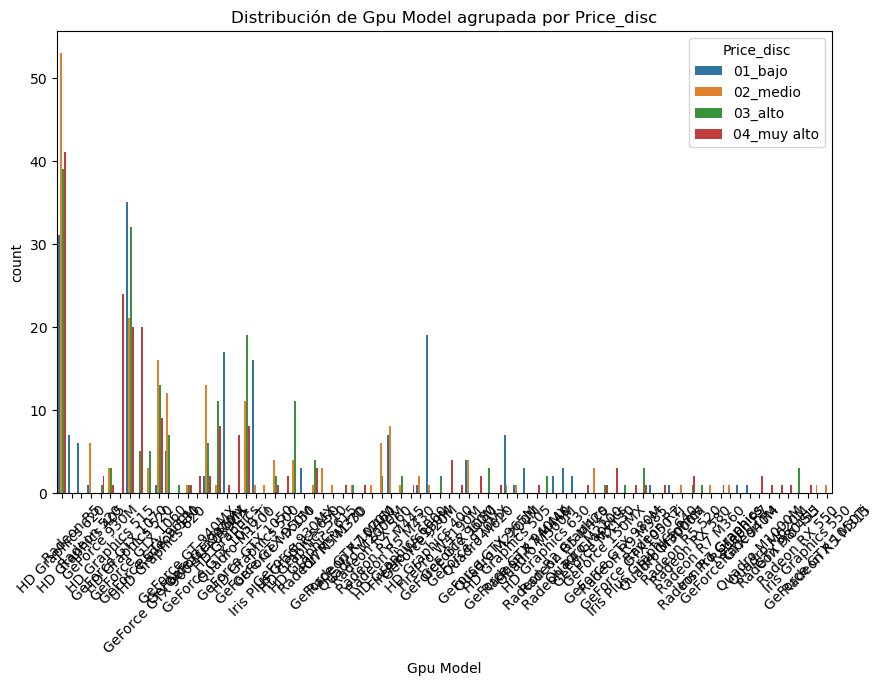

Tabla de contingencia (proporciones):
Price_disc        01_bajo  02_medio  03_alto  04_muy alto
Gpu Model                                                
FirePro W4190M       0.00      0.00     1.00         0.00
FirePro W6150M       0.00      0.00     0.00         1.00
GTX 980 SLI          0.00      0.00     0.00         1.00
GeForce 150MX        0.00      0.00     0.50         0.50
GeForce 920M         0.33      0.67     0.00         0.00
...                   ...       ...      ...          ...
Radeon R9 M385       0.00      0.00     1.00         0.00
Radeon RX 550        0.00      0.00     1.00         0.00
Radeon RX 560        0.00      1.00     0.00         0.00
Radeon RX 580        0.00      0.00     0.33         0.67
UHD Graphics 620     0.03      0.41     0.33         0.23

[80 rows x 4 columns]

Prueba Chi-cuadrado:
Chi-cuadrado: 767.58
p-valor: 0.000
Grados de libertad: 237

La variable Gpu Model está significativamente asociada con Price_disc (p < 0.05). Podría ser útil para

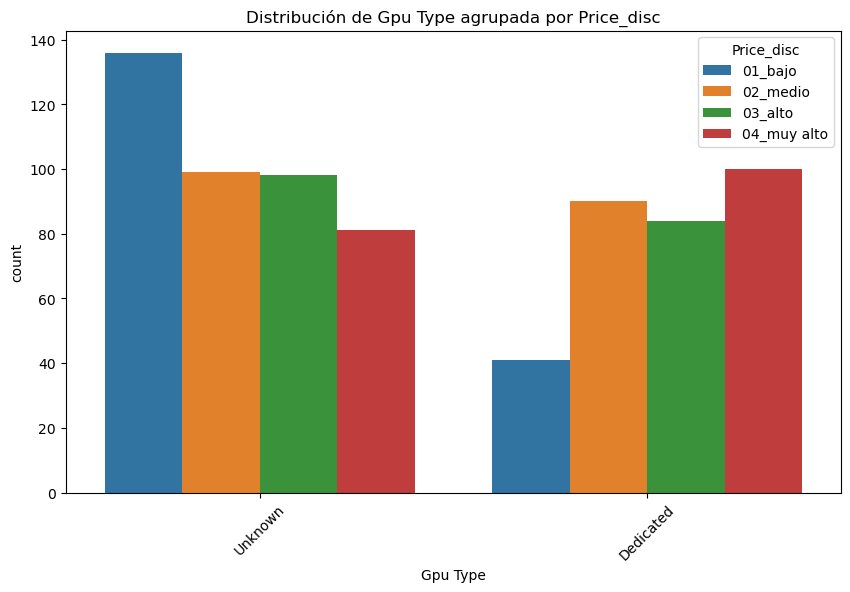

Tabla de contingencia (proporciones):
Price_disc  01_bajo  02_medio  03_alto  04_muy alto
Gpu Type                                           
Dedicated      0.13      0.29     0.27         0.32
Unknown        0.33      0.24     0.24         0.20

Prueba Chi-cuadrado:
Chi-cuadrado: 41.82
p-valor: 0.000
Grados de libertad: 3

La variable Gpu Type está significativamente asociada con Price_disc (p < 0.05). Podría ser útil para el modelo.

Análisis de Storage Type vs Price_disc
****************************************


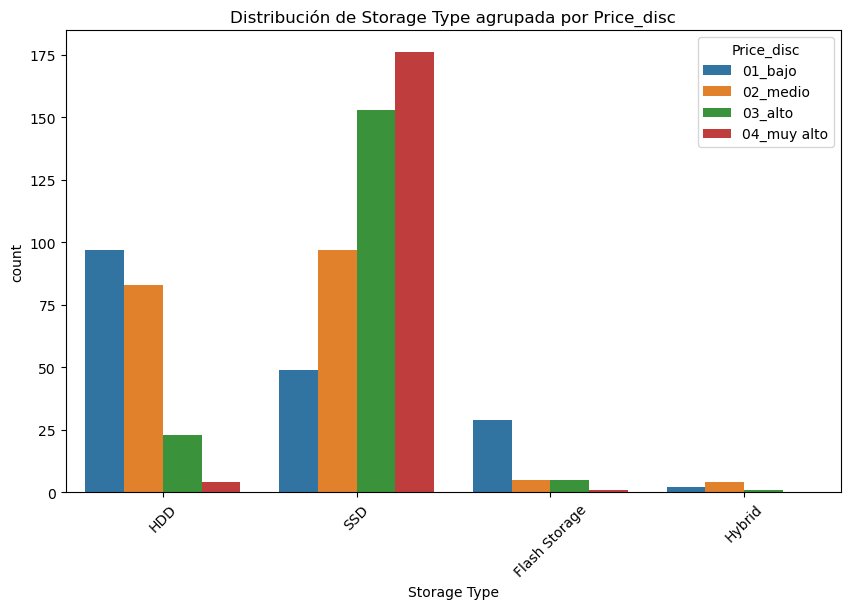

Tabla de contingencia (proporciones):
Price_disc     01_bajo  02_medio  03_alto  04_muy alto
Storage Type                                          
Flash Storage     0.72      0.12     0.12         0.02
HDD               0.47      0.40     0.11         0.02
Hybrid            0.29      0.57     0.14         0.00
SSD               0.10      0.20     0.32         0.37

Prueba Chi-cuadrado:
Chi-cuadrado: 257.75
p-valor: 0.000
Grados de libertad: 9

La variable Storage Type está significativamente asociada con Price_disc (p < 0.05). Podría ser útil para el modelo.

Las features correlacionadas son: ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys', 'Resolution', 'Pantalla', 'Brand', 'Family', 'Model', 'Gpu Brand', 'Gpu Model', 'Gpu Type', 'Storage Type']
Las features NO correlacionadas son: []


In [14]:
analisis_bivariable_categoricas_categorica(train_set,'Price_disc',features_cat)

### Numéricas con target

Matriz de correlación con la variable target:
Ram                      0.754267
Clock Speed (GHz)        0.432146
Weight                   0.287637
Inches                   0.106196
Storage Capacity (GB)   -0.089424
Name: Price_euros, dtype: float64



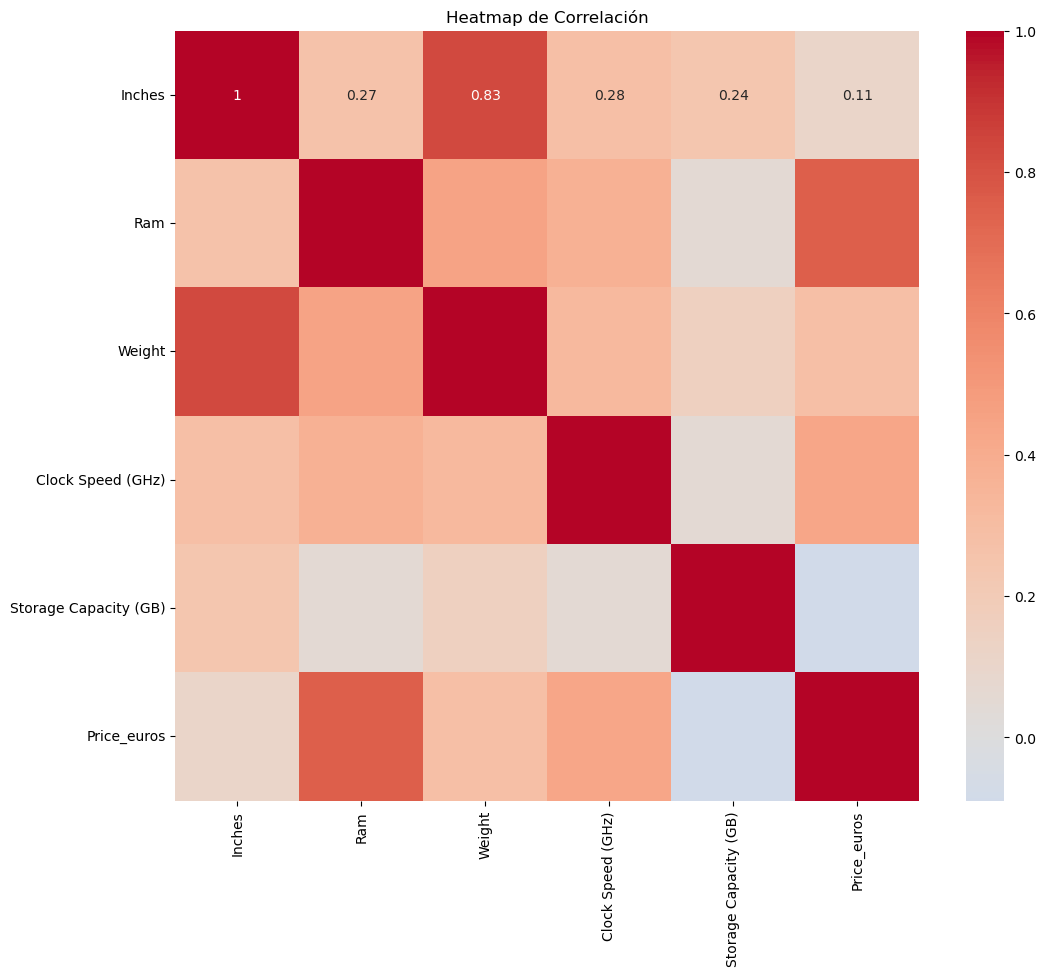

Variables con correlación por debajo del 20%: ['Inches', 'Storage Capacity (GB)']
Variables con correlación por encima del 20%: ['Ram', 'Weight', 'Clock Speed (GHz)', 'Price_euros']

Prueba de correlación para Inches vs Price_euros
****************************************
Prueba de correlación (Spearman):
Estadístico de correlación: -0.02
p-valor: 0.538
La variable Inches no está significativamente asociada con Price_euros (p >= 0.05 o correlación < 0.2).

Prueba de correlación para Ram vs Price_euros
****************************************
Prueba de correlación (Spearman):
Estadístico de correlación: 0.76
p-valor: 0.000
La variable Ram está significativamente asociada con Price_euros (p < 0.05 y correlación >= 0.2). Podría ser útil para el modelo.

Prueba de correlación para Weight vs Price_euros
****************************************
Prueba de correlación (Pearson):
Estadístico de correlación: 0.29
p-valor: 0.000
La variable Weight está significativamente asociada con Price_euros 

{'significant_vars': ['Ram', 'Weight', 'Clock Speed (GHz)'],
 'high_vif_vars': ['Weight', 'Clock Speed (GHz)'],
 'high_corr_vars': [],
 'low_corr_vars': []}

In [15]:
analisis_bivariable_numericas_numerica(train_set,'Price_euros',features_num)

## Selección de features para el modelo

In [16]:
train_set.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros', 'Resolution',
       'Pantalla', 'Brand', 'Family', 'Model', 'Clock Speed (GHz)',
       'Gpu Brand', 'Gpu Model', 'Gpu Type', 'Storage Type',
       'Storage Capacity (GB)', 'Price_disc'],
      dtype='object')

In [17]:
features_visual_first = ['Company', 'TypeName', 'Ram',
       'Memory', 'OpSys', 'Weight', 'Resolution',
       'Pantalla', 'Brand', 'Family', 'Model', 'Clock Speed (GHz)',
       'Gpu Brand', 'Gpu Model', 'Gpu Type', 'Storage Type',
       'Storage Capacity (GB)']

In [18]:
features_visual_all = ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Resolution',
       'Pantalla', 'Brand', 'Family', 'Model', 'Clock Speed (GHz)',
       'Gpu Brand', 'Gpu Model', 'Gpu Type', 'Storage Type',
       'Storage Capacity (GB)','Price_disc']

In [19]:
train_set[features_visual_first]

,Company,TypeName,Ram,Memory,OpSys,Weight,Resolution,Pantalla,Brand,Family,Model,Clock Speed (GHz),Gpu Brand,Gpu Model,Gpu Type,Storage Type,Storage Capacity (GB)
id,,,,,,,,,,,,,,,,,
829,Asus,Notebook,4.0,1TB HDD,Linux,2.00,1920x1080,Full HD,Intel,Core i3,6006U,2.0,Intel,HD Graphics 620,Unknown,HDD,1000
788,Acer,Notebook,4.0,256GB SSD,Windows 10,2.10,1366x768,Full HD,AMD,A9-Series,9420,3.0,AMD,Radeon R5,Dedicated,SSD,256
851,Asus,Notebook,4.0,1TB HDD,Windows 10,2.65,1366x768,Full HD,Intel,Pentium,Quad,1.6,Intel,HD Graphics 405,Unknown,HDD,1000
126,Dell,Notebook,8.0,1TB HDD,Linux,2.20,1920x1080,Full HD,Intel,Core i5,8250U,1.6,AMD,Radeon 520,Dedicated,HDD,1000
223,HP,Notebook,8.0,2TB HDD,Windows 10,1.94,1366x768,Full HD,Intel,Pentium,Quad,1.6,Intel,HD Graphics 405,Unknown,HDD,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,HP,Notebook,4.0,500GB HDD,Windows 10,2.10,1920x1080,Full HD,Intel,Core i5,8250U,1.6,Intel,HD Graphics 620,Unknown,HDD,500
308,MSI,Gaming,16.0,128GB SSD + 1TB HDD,Windows 10,4.14,1920x1080,Full HD,Intel,Core i7,6820HK,2.7,Nvidia,GeForce GTX 970M,Dedicated,SSD,128
281,HP,Notebook,4.0,256GB SSD,Windows 10,1.48,1920x1080,Full HD,Intel,Core i5,7200U,2.5,Intel,HD Graphics 620,Unknown,SSD,256


In [20]:
train_set[features_visual_first].select_dtypes(include=['object'])

,Company,TypeName,Memory,OpSys,Resolution,Pantalla,Brand,Family,Model,Gpu Brand,Gpu Model,Gpu Type,Storage Type
id,,,,,,,,,,,,,
829,Asus,Notebook,1TB HDD,Linux,1920x1080,Full HD,Intel,Core i3,6006U,Intel,HD Graphics 620,Unknown,HDD
788,Acer,Notebook,256GB SSD,Windows 10,1366x768,Full HD,AMD,A9-Series,9420,AMD,Radeon R5,Dedicated,SSD
851,Asus,Notebook,1TB HDD,Windows 10,1366x768,Full HD,Intel,Pentium,Quad,Intel,HD Graphics 405,Unknown,HDD
126,Dell,Notebook,1TB HDD,Linux,1920x1080,Full HD,Intel,Core i5,8250U,AMD,Radeon 520,Dedicated,HDD
223,HP,Notebook,2TB HDD,Windows 10,1366x768,Full HD,Intel,Pentium,Quad,Intel,HD Graphics 405,Unknown,HDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,HP,Notebook,500GB HDD,Windows 10,1920x1080,Full HD,Intel,Core i5,8250U,Intel,HD Graphics 620,Unknown,HDD
308,MSI,Gaming,128GB SSD + 1TB HDD,Windows 10,1920x1080,Full HD,Intel,Core i7,6820HK,Nvidia,GeForce GTX 970M,Dedicated,SSD
281,HP,Notebook,256GB SSD,Windows 10,1920x1080,Full HD,Intel,Core i5,7200U,Intel,HD Graphics 620,Unknown,SSD


In [21]:
train_set[features_visual_first].select_dtypes(include=['int','float'])

,Ram,Weight,Clock Speed (GHz),Storage Capacity (GB)
id,,,,
829,4.0,2.00,2.0,1000
788,4.0,2.10,3.0,256
851,4.0,2.65,1.6,1000
126,8.0,2.20,1.6,1000
223,8.0,1.94,1.6,2000
...,...,...,...,...
555,4.0,2.10,1.6,500
308,16.0,4.14,2.7,128
281,4.0,1.48,2.5,256


#### Transformación variables categóricas a numéricas

In [22]:
features_visual_select_cat = train_set[features_visual_all].select_dtypes(include=['object']).columns.tolist()
features_visual_select_cat


['Company',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Memory',
 'Gpu',
 'OpSys',
 'Resolution',
 'Pantalla',
 'Brand',
 'Family',
 'Model',
 'Gpu Brand',
 'Gpu Model',
 'Gpu Type',
 'Storage Type',
 'Price_disc']

In [35]:
train_set[features_visual_select_cat]

KeyError: "None of [Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu',\n       'OpSys', 'Resolution', 'Pantalla', 'Brand', 'Family', 'Model',\n       'Gpu Brand', 'Gpu Model', 'Gpu Type', 'Storage Type', 'Price_disc'],\n      dtype='object')] are in the [columns]"

In [23]:
train_set = pd.get_dummies(train_set, columns=features_visual_select_cat,dtype=int )


In [24]:
train_set


,Inches,Ram,Weight,Price_euros,Clock Speed (GHz),Storage Capacity (GB),Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,Gpu Type_Dedicated,Gpu Type_Unknown,Storage Type_Flash Storage,Storage Type_HDD,Storage Type_Hybrid,Storage Type_SSD,Price_disc_01_bajo,Price_disc_02_medio,Price_disc_03_alto,Price_disc_04_muy alto
id,,,,,,,,,,,,,,,,,,,,,
829,15.6,4.0,2.00,389.0,2.0,1000,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
788,15.6,4.0,2.10,451.0,3.0,256,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
851,15.6,4.0,2.65,309.0,1.6,1000,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
126,15.6,8.0,2.20,647.0,1.6,1000,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
223,14.0,8.0,1.94,389.0,1.6,2000,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,15.6,4.0,2.10,722.0,1.6,500,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
308,17.3,16.0,4.14,2199.0,2.7,128,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
281,14.0,4.0,1.48,1590.0,2.5,256,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [25]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 829 to 327
Columns: 479 entries, Inches to Price_disc_04_muy alto
dtypes: float64(5), int32(473), int64(1)
memory usage: 1.4 MB


#### Separación X_train, y_train

In [26]:
X_train = train_set.drop(columns=['Price_euros'])
y_train = train_set['Price_euros']

#### Selección de features numéricas mediante SelectKBeest y Anova

In [27]:
selector =SelectKBest(f_regression, k = 30)

x_data_kbest = selector.fit_transform(X_train, y_train)

X_train_kBest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kBest.columns

Index(['Ram', 'Weight', 'Clock Speed (GHz)', 'Company_Razer',
       'TypeName_Gaming', 'TypeName_Notebook', 'ScreenResolution_1366x768',
       'ScreenResolution_4K Ultra HD / Touchscreen 3840x2160',
       'Cpu_Intel Core i7 7700HQ 2.8GHz', 'Cpu_Intel Core i7 7820HK 2.9GHz',
       'Memory_1TB SSD', 'Memory_512GB SSD', 'Gpu_Nvidia GeForce GTX 1070',
       'Gpu_Nvidia GeForce GTX 1080', 'Resolution_1366x768',
       'Resolution_3840x2160', 'Pantalla_4K Ultra HD', 'Pantalla_Full HD',
       'Family_Celeron', 'Family_Core i7', 'Model_7700HQ', 'Model_7820HK',
       'Gpu Brand_Nvidia', 'Gpu Model_GeForce GTX 1070',
       'Gpu Model_GeForce GTX 1080', 'Storage Type_HDD', 'Storage Type_SSD',
       'Price_disc_01_bajo', 'Price_disc_02_medio', 'Price_disc_04_muy alto'],
      dtype='object')

In [39]:
features_anova = X_train_kBest.columns

#### Selección usando modelo SelectFromModel

In [28]:
rf_selector = RandomForestRegressor(max_depth=5,random_state=42)
rf_selector.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [29]:
rf_selector.feature_importances_[rf_selector.feature_importances_ > rf_selector.feature_importances_.mean()]

array([0.05416903, 0.04123843, 0.01494793, 0.00582599, 0.02236766,
       0.00542936, 0.00250525, 0.00466452, 0.00672331, 0.00256823,
       0.00301326, 0.00402874, 0.02106504, 0.00974915, 0.10946765,
       0.66651165])

In [30]:
# Instanciamos el modelo
selector_model = SelectFromModel(estimator=rf_selector,threshold= 'mean')

# Entrenamos
selector_model.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestRegressor(max_depth=5, random_state=42),
                threshold='mean')

In [31]:
# Saco el nombre de las features que están por encima de la mediana
selector_model.get_feature_names_out()

array(['Ram', 'Weight', 'Clock Speed (GHz)', 'Storage Capacity (GB)',
       'Company_Razer',
       'ScreenResolution_4K Ultra HD / Touchscreen 3840x2160',
       'Cpu_Intel Core i7 7820HK 2.9GHz', 'Memory_1TB SSD',
       'Gpu_Nvidia GeForce GTX 1080', 'Gpu_Nvidia Quadro M3000M',
       'Gpu Model_GeForce GTX 1080', 'Gpu Model_Quadro M3000M',
       'Price_disc_01_bajo', 'Price_disc_02_medio', 'Price_disc_03_alto',
       'Price_disc_04_muy alto'], dtype=object)

In [40]:
features_selector = selector_model.get_feature_names_out()

#### Selección usando RFE

In [32]:
# Instnacio modelo de clasificación
rf_RFE = RandomForestRegressor(max_depth=5,random_state=42)
# Sobre el modelo instancio el rfe
rfe = RFE(
    estimator=rf_RFE,
    n_features_to_select=30,
    step=1
)

# Entreno el modelo rfe
rfe.fit(X_train,y_train)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_,columns=['ranking'], index=X_train.columns).sort_values('ranking')[:30]

[  1   1   1   1   1  29 118  31 136   1 144 134  26 150  33  48 127 133
   1 143  60 171 103  80  16  92  32  81   1  49 156 102 112 124   1  27
  99   8 151  56 202  94 142  58 164 137 232 129 158 166 149 203 155 189
 165 147 191 233 140 199 212 193 240 248 188 237 256 246 259 227 262 214
 267 239 258 242 195 196 162 230 206 245 295 221 247 113 119 311 220 320
 182 228 273 229 289 244 123 249 275 169 317 272 252 263 347 277 110 333
 328 152 241 325 314 269  38 114 297 330  52  96 292 177 210 312 298 107
 321 148 371 366  84 316  93 355 343 358  83 375 391  55   1 115 387  61
 331 362 378  72 309 250 369 423 340 393 327  51   6 176 350 318  91 108
 359   1   1 105 121  20 125  14 394 266 254 204  97 345 211  70 364  36
  66  57 363 279 278 276 286 285  74 348 367 300 101  69 334 370 373 380
 376 383 386 389 397 396 399 400 404 406 405 408 410 414 415 418 419 403
 424 428 420 432 430 435 138 436 234  76 444 442 448  50 361 353 139 357
 425 437 439 445  78 434  46 402 398  62 374 372   

,ranking
Inches,1
Cpu_Intel Core i7 7820HK 2.9GHz,1
Memory_1TB SSD,1
Memory_1TB SSD + 1TB HDD,1
Price_disc_03_alto,1
Gpu_Nvidia GeForce GTX 1070,1
Gpu_Nvidia GeForce GTX 1080,1
Gpu_Nvidia Quadro M3000M,1
Resolution_1920x1080,1
Resolution_3840x2160,1


In [44]:
temp = pd.DataFrame(rfe.ranking_,columns=['ranking'], index=X_train.columns).sort_values('ranking')[:30]
temp.index[:30]
features_rfe = temp.index[:30]

#### Selección por SFS

In [33]:
# Instancio modelo clasificación
rf_sfs = RandomForestRegressor(max_depth=5,random_state=42)
# Instancio el modelo de la features selection
sfs_fordward = SequentialFeatureSelector(
    rf_sfs,
    n_features_to_select=30,
    cv = 4,
    scoring='neg_median_absolute_error' 
)

# Entreno el modelo de features_selection
sfs_fordward.fit(X_train,y_train)

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestRegressor(max_depth=5,
                                                          random_state=42),
                          n_features_to_select=30,
                          scoring='neg_median_absolute_error')

In [34]:
# printar las features seleccionadas
print("Elegidasd SFS:", sfs_fordward.get_feature_names_out())

Elegidasd SFS: ['Ram' 'Storage Capacity (GB)' 'ScreenResolution_1366x768'
 'ScreenResolution_IPS Panel Full HD 1920x1200'
 'ScreenResolution_IPS Panel Quad HD+ / Touchscreen 3200x1800'
 'ScreenResolution_Touchscreen 2560x1440' 'Cpu_AMD A8-Series 7410 2.2GHz'
 'Cpu_Intel Core M M3-6Y30 0.9GHz' 'Cpu_Intel Core i3 6006U 2.0GHz'
 'Cpu_Intel Core i3 6100U 2.3GHz'
 'Cpu_Intel Pentium Dual Core N4200 1.1GHz' 'Memory_1.0TB HDD'
 'Memory_64GB Flash Storage' 'Gpu_AMD Radeon R5 M330'
 'Gpu_Nvidia GeForce GTX 1070' 'Gpu_Nvidia Quadro M2200M' 'OpSys_Linux'
 'Resolution_1920x1200' 'Family_Core i5' 'Model_7Y30' 'Model_9220'
 'Model_Dual' 'Model_M7-6Y75' 'Gpu Model_HD Graphics 510'
 'Gpu Model_Radeon R5 M430' 'Gpu Model_Radeon R7'
 'Gpu Model_Radeon R7 Graphics' 'Price_disc_02_medio' 'Price_disc_03_alto'
 'Price_disc_04_muy alto']


In [46]:
features_sfs = sfs_fordward.get_feature_names_out()

#### Prueba mejores modelos con cross_val_score


In [38]:
lin_reg = LinearRegression()
rf_model = RandomForestRegressor(max_depth=5, random_state=42)
xgb = XGBRFRegressor(max_depth = 5, random_state = 42)
knn = KNeighborsRegressor(n_neighbors=5)

In [52]:
# Lista de features
features_list = [features_anova, features_selector,features_rfe,features_sfs]
features_list_name = ['ANNOVA', 'SelectFromModel','RFE','SFS']

# Nombre de los modelos:
model_name = ['LinearRegression','RandomForestregression','XGBoostRegressor','KNN']

# Variables con modelos:
model_list = [lin_reg,rf_model,xgb,knn]

for i,lista in enumerate(features_list):
    for j,modelo in enumerate(model_list):
        score = np.mean(cross_val_score(modelo, train_set[lista], y_train, cv = 5, scoring = 'neg_median_absolute_error')).round(2)
        print(f'Lista: {features_list_name[i]} y modelo: {model_name[j]}: {score}')
    print()

Lista: ANNOVA y modelo: LinearRegression: -95.78
Lista: ANNOVA y modelo: RandomForestregression: -94.54
Lista: ANNOVA y modelo: XGBoostRegressor: -94.18
Lista: ANNOVA y modelo: KNN: -98.91

Lista: SelectFromModel y modelo: LinearRegression: -98.36
Lista: SelectFromModel y modelo: RandomForestregression: -92.48
Lista: SelectFromModel y modelo: XGBoostRegressor: -93.93
Lista: SelectFromModel y modelo: KNN: -108.74

Lista: RFE y modelo: LinearRegression: -97.21
Lista: RFE y modelo: RandomForestregression: -92.48
Lista: RFE y modelo: XGBoostRegressor: -96.05
Lista: RFE y modelo: KNN: -101.83

Lista: SFS y modelo: LinearRegression: -102.59
Lista: SFS y modelo: RandomForestregression: -89.49
Lista: SFS y modelo: XGBoostRegressor: -92.5
Lista: SFS y modelo: KNN: -108.26



In [59]:
X_train_model = train_set[features_sfs]

param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['absolute_error'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_model_grid = GridSearchCV(estimator=rf_model,
							   param_grid=param_grid,
							   scoring='neg_median_absolute_error',
							   cv=5,
							   n_jobs=-1)

rf_model_grid.fit(X_train_model, y_train)



c:\Users\Alfonso\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
791 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Alfonso\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Alfonso\miniconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Alfonso\miniconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Alfonso\miniconda

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['absolute_error'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_median_absolute_error')

In [60]:
best_model_clf = rf_model_grid.best_estimator_
best_params_clf = rf_model_grid.best_params_
best_score_clf = rf_model_grid.best_score_

print(f'Best Parameters for Classification: {best_params_clf}')
print(f'Best Score for Classification: {best_score_clf}')

Best Parameters for Classification: {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score for Classification: -81.96148500000004


In [63]:
y_predict = rf_model_grid.predict(X_train_model)

mae = mean_absolute_error(y_train, y_predict)
print('MAE',mae)

MAE 104.0248303155007


#### Comparo contra test

In [ ]:
y_predict_test = 